In [22]:
## Random Forest model

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

RF_X = data.iloc[:, 4:28]  # Columns E to AC
RF_y = data.iloc[:, 3]     # Column D

# Split the data into training and testing sets
RF_X_train, RF_X_test, RF_y_train, RF_y_test = train_test_split(RF_X, RF_y, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies the Random Forest Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Set up the GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
grid_search.fit(RF_X_train, RF_y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict the values for the test set
RF_y_pred = best_model.predict(RF_X_test)

# Calculate RMSE
RF_rmse = np.sqrt(mean_squared_error(RF_y_test, RF_y_pred))

# Calculate Mean Squared Forecast Error (MSFE)
RF_msfe = mean_squared_error(RF_y_test, RF_y_pred)

# Calculate out-of-sample R-squared (R^2_OS)
numerator = np.sum((RF_y_test - RF_y_pred) ** 2)
denominator = np.sum((RF_y_test - np.mean(RF_y_train)) ** 2)
RF_r2_os = 1 - (numerator / denominator)

# Print the best parameters, RMSE, MSFE, and out-of-sample R-squared value
print("Best Parameters:", best_params)
print("Root Mean Squared Error (RMSE):", RF_rmse)
print("Mean Squared Forecast Error (MSFE):", RF_msfe)
print("Out-of-sample R-squared (R^2_OS):", RF_r2_os)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'rf__bootstrap': True, 'rf__max_depth': 30, 'rf__max_features': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Root Mean Squared Error (RMSE): 5.709697088976417
Mean Squared Forecast Error (MSFE): 32.60064084786576
Out-of-sample R-squared (R^2_OS): 0.6850001889265556


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

RF_X = data.iloc[:, 4:28]  # Columns E to AC
RF_y = data.iloc[:, 3]     # Column D

# Split the data into training and testing sets
RF_X_train, RF_X_test, RF_y_train, RF_y_test = train_test_split(RF_X, RF_y, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies the Random Forest Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=300, 
        max_features=None, 
        max_depth=30, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        bootstrap=True,
        random_state=42
    ))
])

# Fit the model
pipeline.fit(RF_X_train, RF_y_train)

# Predict the values for the test set
RF_y_pred = pipeline.predict(RF_X_test)

# Calculate RMSE
RF_rmse = np.sqrt(mean_squared_error(RF_y_test, RF_y_pred))

# Calculate Mean Squared Forecast Error (MSFE)
RF_msfe = mean_squared_error(RF_y_test, RF_y_pred)

# Calculate out-of-sample R-squared (R^2_OS)
numerator = np.sum((RF_y_test - RF_y_pred) ** 2)
denominator = np.sum((RF_y_test - np.mean(RF_y_train)) ** 2)
RF_r2_os = 1 - (numerator / denominator)

# Print the RMSE, MSFE, and out-of-sample R-squared value
print("Root Mean Squared Error (RMSE):", RF_rmse)
print("Mean Squared Forecast Error (MSFE):", RF_msfe)
print("Out-of-sample R-squared (R^2_OS):", RF_r2_os)

Root Mean Squared Error (RMSE): 5.709697088976417
Mean Squared Forecast Error (MSFE): 32.60064084786576
Out-of-sample R-squared (R^2_OS): 0.6850001889265556


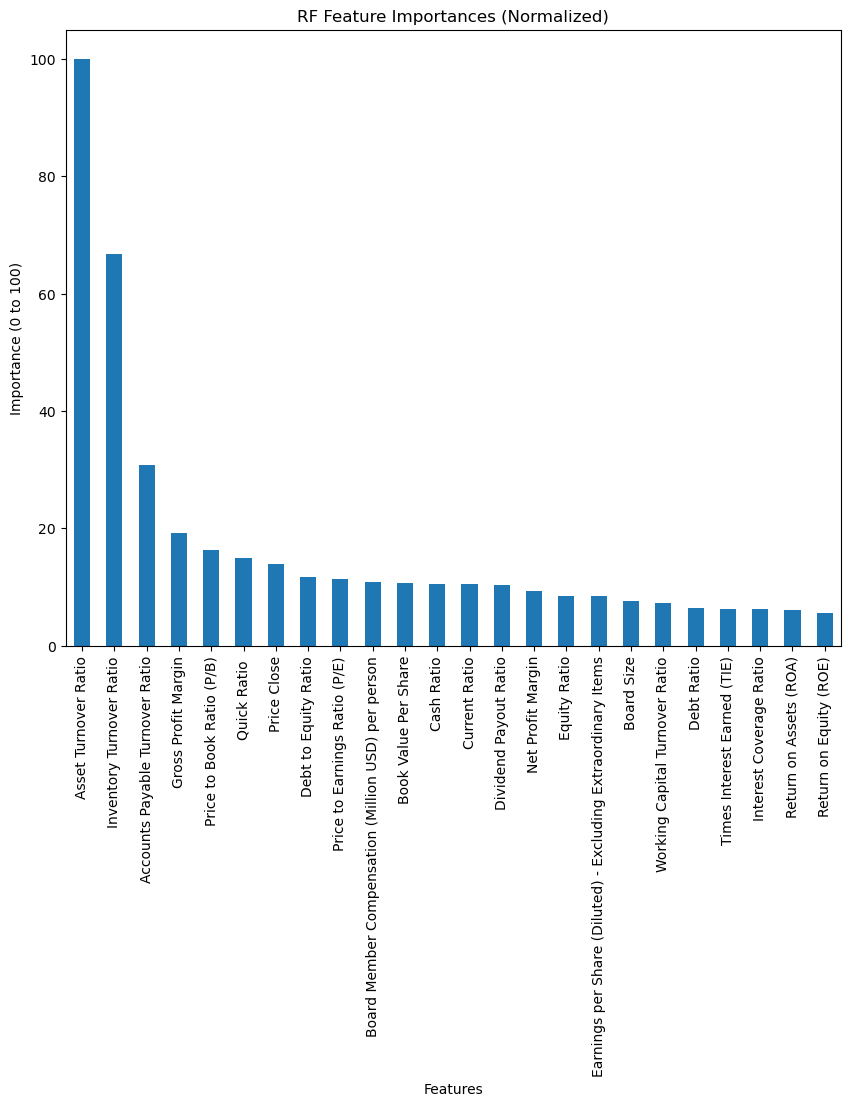

Number of features with importance greater than 5%: 24


In [5]:
# Extracting the feature importances from the fitted model
importances = pipeline.named_steps['rf'].feature_importances_
feature_names = RF_X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('RF Feature Importances (Normalized)')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

# Count the number of features with importance greater than 5%
num_important_features = (normalized_importances > 5).sum()

# Display the number of important features
print("Number of features with importance greater than 5%:", num_important_features)

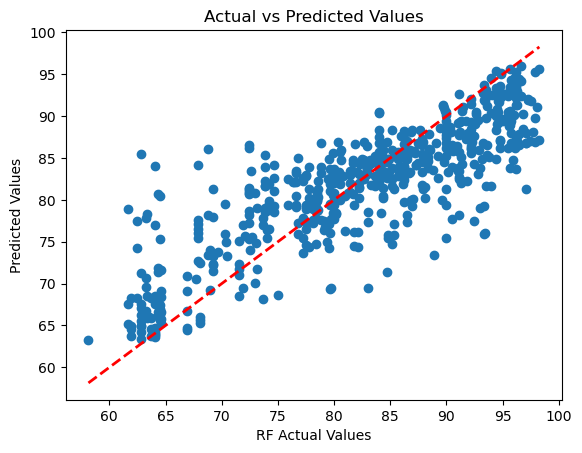

In [20]:
# Plot predicted vs actual values
plt.scatter(RF_y_test, RF_y_pred)
plt.plot([RF_y_test.min(), RF_y_test.max()], [RF_y_test.min(), RF_y_test.max()], 'r--', lw=2)
plt.xlabel('RF Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


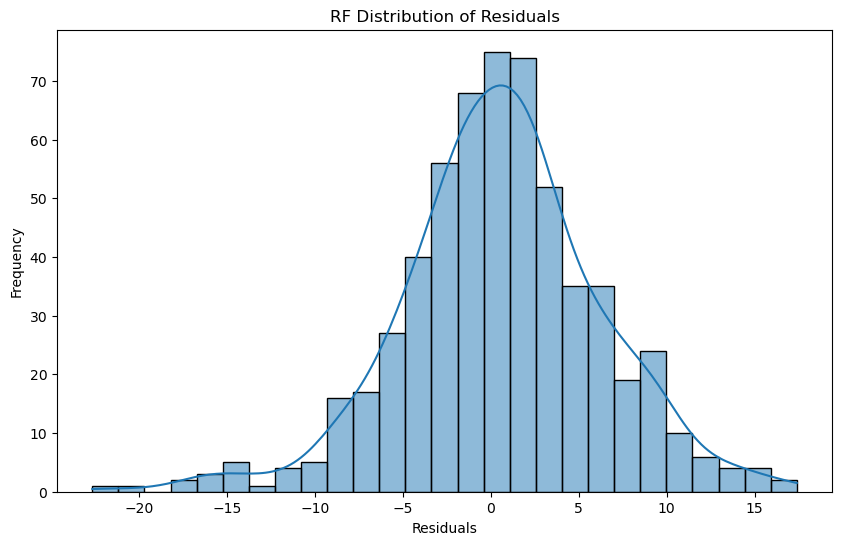

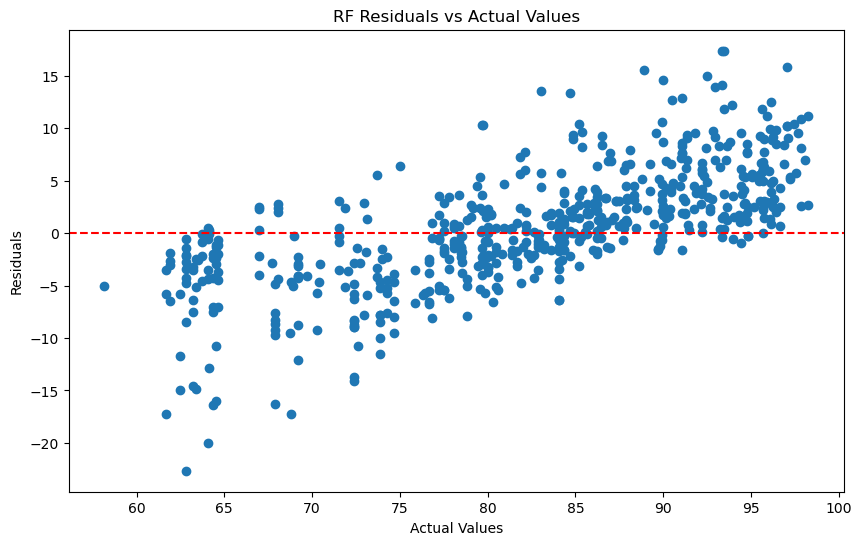

In [22]:
import seaborn as sns
# Calculate residuals
RF_residuals =RF_y_test - RF_y_pred

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(RF_residuals, kde=True)
plt.title("RF Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot residuals vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(RF_y_test, RF_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('RF Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


In [20]:
## eXtreme Gradient Boosting

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Load the data
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
XG_X = data.iloc[:, 4:28]
XG_y = data.iloc[:, 3]

# Split the data into training and testing sets
XG_X_train, XG_X_test, XG_y_train, XG_y_test = train_test_split(XG_X, XG_y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
XG_X_train_scaled = scaler.fit_transform(XG_X_train)
XG_X_test_scaled = scaler.transform(XG_X_test)

# Initialize the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameters for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
grid_search.fit(XG_X_train_scaled, XG_y_train)

# Get the best model from grid search
best_xg_reg = grid_search.best_estimator_

# Output the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Predict on the test set
XG_y_pred = best_xg_reg.predict(XG_X_test_scaled)

# Calculate RMSE
XG_rmse = np.sqrt(mean_squared_error(XG_y_test, XG_y_pred))
print(f'XG_RMSE: {XG_rmse}')

# Calculate Mean Squared Forecast Error (MSFE)
XG_MSFE = mean_squared_error(XG_y_test, XG_y_pred)
print(f'XG_MSFE: {XG_MSFE}')

# Calculate out-of-sample R-squared (R^2_OS)
XG_numerator = np.sum((XG_y_test - XG_y_pred) ** 2)
XG_denominator = np.sum((XG_y_test - np.mean(XG_y_train)) ** 2)
XG_R2_OS = 1 - (XG_numerator / XG_denominator)
print(f'XG_Out-of-sample R-squared: {XG_R2_OS}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0

[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Load the data
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
XG_X = data.iloc[:, 4:28]
XG_y = data.iloc[:, 3]

# Split the data into training and testing sets
XG_X_train, XG_X_test, XG_y_train, XG_y_test = train_test_split(XG_X, XG_y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
XG_X_train_scaled = scaler.fit_transform(XG_X_train)
XG_X_test_scaled = scaler.transform(XG_X_test)

# Initialize the XGBoost model with the best hyperparameters
best_xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.7,
    random_state=42
)

# Fit the model
best_xg_reg.fit(XG_X_train_scaled, XG_y_train)

# Predict on the test set
XG_y_pred = best_xg_reg.predict(XG_X_test_scaled)

# Calculate RMSE
XG_rmse = np.sqrt(mean_squared_error(XG_y_test, XG_y_pred))
print(f'XG_RMSE: {XG_rmse}')

# Calculate Mean Squared Forecast Error (MSFE)
XG_msfe = mean_squared_error(XG_y_test, XG_y_pred)
print(f'XG_MSFE: {XG_msfe}')

# Calculate out-of-sample R-squared (R^2_OS)
XG_numerator = np.sum((XG_y_test - XG_y_pred) ** 2)
XG_denominator = np.sum((XG_y_test - np.mean(XG_y_train)) ** 2)
XG_r2_os = 1 - (XG_numerator / XG_denominator)
print(f'XG_Out-of-sample R-squared: {XG_r2_os}')

XG_RMSE: 5.469646170096909
XG_MSFE: 29.91702922605578
XG_Out-of-sample R-squared: 0.7109302667372801


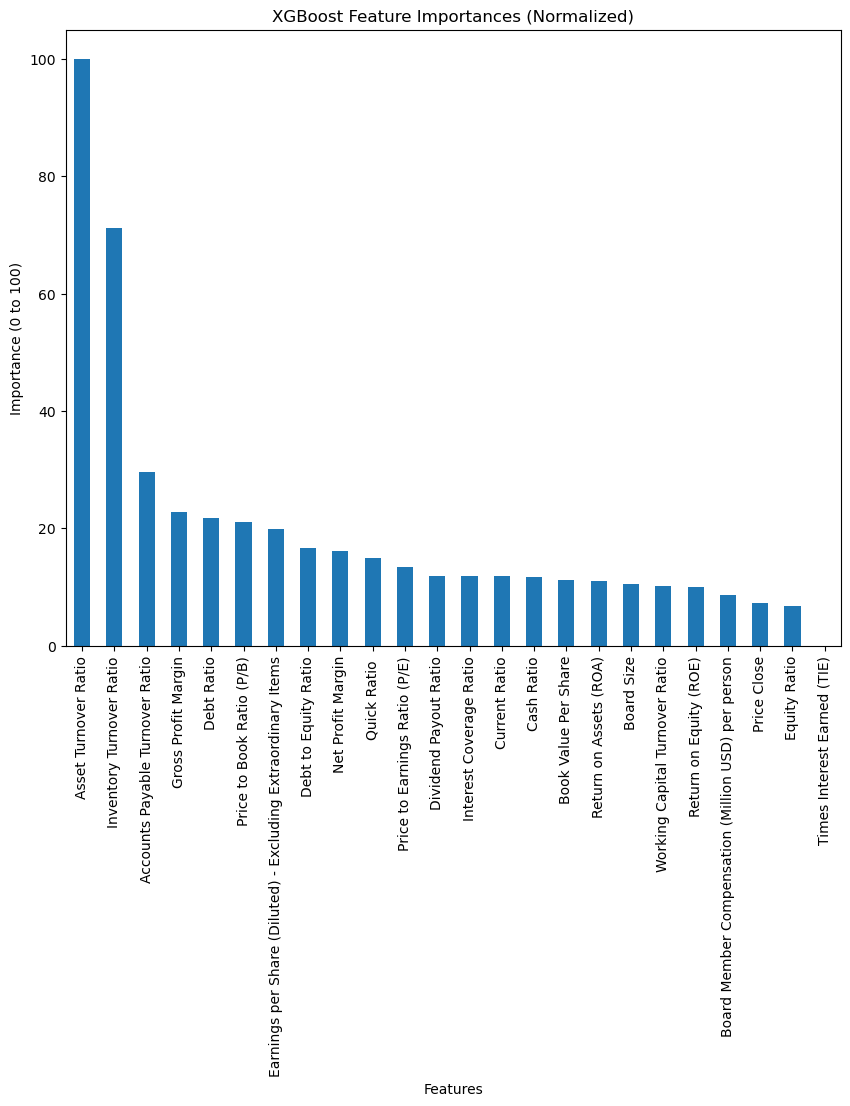

Number of features with importance greater than 5%: 23


In [19]:
# Extracting the feature importances from the fitted model
importances = best_xg_reg.feature_importances_
feature_names = XG_X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('XGBoost Feature Importances (Normalized)')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

# Count the number of features with importance greater than 5%
num_important_features = (normalized_importances > 5).sum()

# Display the number of important features
print("Number of features with importance greater than 5%:", num_important_features)

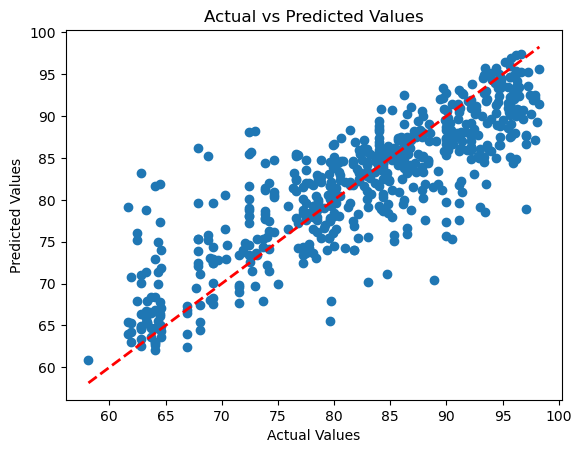

In [27]:
# Plot predicted vs actual values
plt.scatter(XG_y_test, XG_y_pred)
plt.plot([XG_y_test.min(), XG_y_test.max()], [XG_y_test.min(), XG_y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


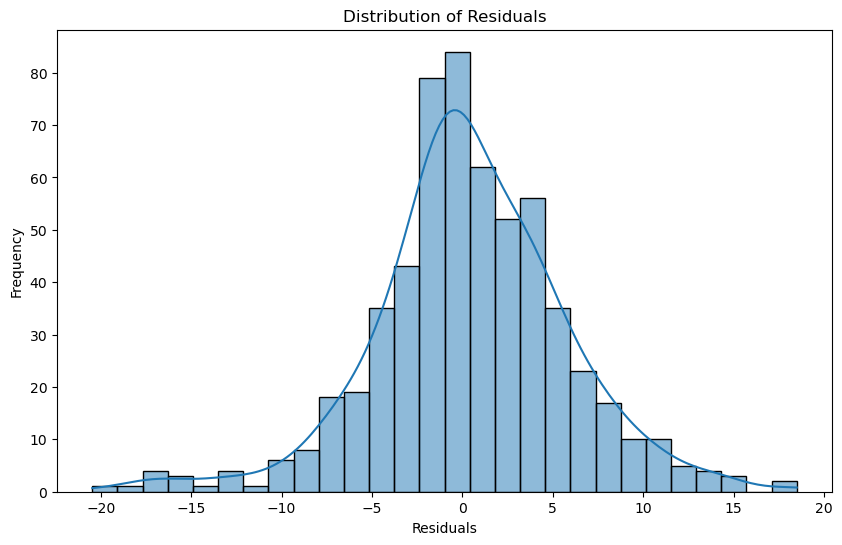

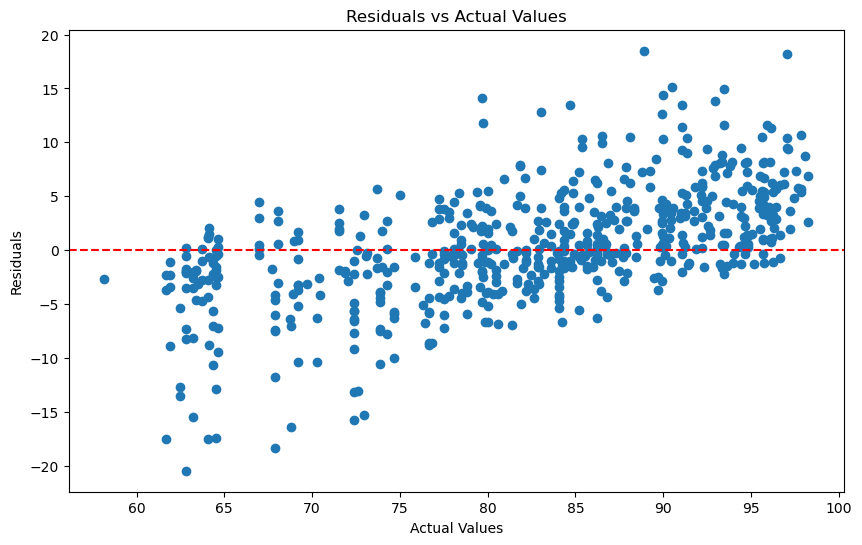

In [28]:
# Calculate residuals
XG_residuals = XG_y_test - XG_y_pred

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(XG_residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot residuals vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(XG_y_test, XG_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


In [29]:
##ANN

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import tempfile

# Load the data from Excel file
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
AN_X = data.iloc[:, 4:28]
AN_y = data.iloc[:, 3]

# Split the data into training and testing sets
AN_X_train, AN_X_test, AN_y_train, AN_y_test = train_test_split(AN_X, AN_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
AN_X_train = scaler.fit_transform(AN_X_train)
AN_X_test = scaler.transform(AN_X_test)

# Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(AN_X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Create a temporary directory for the tuner
with tempfile.TemporaryDirectory() as tmpdirname:
    # Use Keras Tuner for Bayesian optimization
    tuner = kt.BayesianOptimization(
        build_model,
        objective='val_mean_squared_error',
        max_trials=1000,  # Number of trials
        directory=tmpdirname,
        project_name='ann_bayesian_tuning'
    )

    # Search for the best hyperparameters
    tuner.search(AN_X_train, AN_y_train, epochs=100, validation_split=0.2, 
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Get the optimal hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# List out the best hyperparameters
print(f"Best hyperparameters: \n"
      f"units_1: {best_hps.get('units_1')}\n"
      f"dropout_1: {best_hps.get('dropout_1')}\n"
      f"units_2: {best_hps.get('units_2')}\n"
      f"dropout_2: {best_hps.get('dropout_2')}")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(AN_X_train, AN_y_train, epochs=100, validation_split=0.2, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

# Predict on the test set
AN_y_pred = model.predict(AN_X_test)

# Calculate the RMSE
AN_rmse = np.sqrt(mean_squared_error(AN_y_test, AN_y_pred))
print(f'RMSE: {AN_rmse}')

# Calculate the Mean Squared Forecast Error (MSFE)
AN_msfe = mean_squared_error(AN_y_test, AN_y_pred)
print(f'MSFE: {AN_msfe}')

# Calculate the out-of-sample R-squared (R²_OS)
numerator = np.sum((AN_y_test - AN_y_pred.flatten()) ** 2)
denominator = np.sum((AN_y_test - np.mean(AN_y_train)) ** 2)
AN_r2_os = 1 - (numerator / denominator)
print(f'Out-of-sample R-squared: {AN_r2_os}')

Trial 1000 Complete [00h 00m 23s]
val_mean_squared_error: 65.70738983154297

Best val_mean_squared_error So Far: 56.668460845947266
Total elapsed time: 05h 43m 52s
Best hyperparameters: 
units_1: 64
dropout_1: 0.1
units_2: 512
dropout_2: 0.0
Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6216.1089 - mean_squared_error: 6216.1089 - val_loss: 3851.1277 - val_mean_squared_error: 3851.1277
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3407.5952 - mean_squared_error: 3407.5952 - val_loss: 1577.5830 - val_mean_squared_error: 1577.5830
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1969.7434 - mean_squared_error: 1969.7434 - val_loss: 801.6757 - val_mean_squared_error: 801.6757
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1437.3235 - mean_squared_error: 1437.3235 - val_loss: 672.8695 - val_mean_squared_error: 672.8695
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 901.7202 - mean_squared_error: 901.7202 - val_loss: 540.8119 - val_

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 90.7940 - mean_squared_error: 90.7940 - val_loss: 80.5224 - val_mean_squared_error: 80.5224
Epoch 44/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 103.3847 - mean_squared_error: 103.3847 - val_loss: 82.3636 - val_mean_squared_error: 82.3636
Epoch 45/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87.8164 - mean_squared_error: 87.8164 - val_loss: 83.2059 - val_mean_squared_error: 83.2059
Epoch 46/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 83.8835 - mean_squared_error: 83.8835 - val_loss: 79.5350 - val_mean_squared_error: 79.5350
Epoch 47/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 82.3568 - mean_squared_error: 82.3568 - val_loss: 84.0184 - val_mean_squared_error: 84.0184
Epoch 48/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 88.3944 - mean_squared_error: 88.3944 - val_loss: 80.7692 - val_mean_squared_error: 80.7692
Epoch 49/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 81.8145 - mean_squared_error: 81.8145 -

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the data from Excel file
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
AN_X = data.iloc[:, 4:28]
AN_y = data.iloc[:, 3]

# Split the data into training and testing sets
AN_X_train, AN_X_test, AN_y_train, AN_y_test = train_test_split(AN_X, AN_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
AN_X_train = scaler.fit_transform(AN_X_train)
AN_X_test = scaler.transform(AN_X_test)

# Best hyperparameters obtained from the tuner
best_units_1 = 64
best_dropout_1 = 0.1
best_units_2 = 512
best_dropout_2 = 0.0

# Build the model with the optimal hyperparameters
model = Sequential([
    Input(shape=(AN_X_train.shape[1],)),
    Dense(units=best_units_1, activation='relu'),
    Dropout(rate=best_dropout_1),
    Dense(units=best_units_2, activation='relu'),
    Dropout(rate=best_dropout_2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(AN_X_train, AN_y_train, epochs=100, validation_split=0.2, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

# Predict on the test set
AN_y_pred = model.predict(AN_X_test).flatten()

# Calculate the RMSE
AN_rmse = np.sqrt(mean_squared_error(AN_y_test, AN_y_pred))
print(f'RMSE: {AN_rmse}')

# Calculate the Mean Squared Forecast Error (MSFE)
AN_msfe = mean_squared_error(AN_y_test, AN_y_pred)
print(f'MSFE: {AN_msfe}')

# Calculate the out-of-sample R-squared (R²_OS)
numerator = np.sum((AN_y_test - AN_y_pred) ** 2)
denominator = np.sum((AN_y_test - np.mean(AN_y_train)) ** 2)
AN_r2_os = 1 - (numerator / denominator)
print(f'Out-of-sample R-squared: {AN_r2_os}')

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6366.7026 - mean_squared_error: 6366.7026 - val_loss: 4223.5801 - val_mean_squared_error: 4223.5801
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3621.1543 - mean_squared_error: 3621.1543 - val_loss: 1604.3376 - val_mean_squared_error: 1604.3376
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2224.8054 - mean_squared_error: 2224.8054 - val_loss: 1022.9504 - val_mean_squared_error: 1022.9504
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1472.4098 - mean_squared_error: 1472.4098 - val_loss: 755.4206 - val_mean_squared_error: 755.4206
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 848.8948 - mean_squared_error: 848.8948 - val_loss: 589.9490 - val_mean_squared_error: 589.9490
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 853.8819 - mean_squared_error: 853.8819 - val_loss: 489.6204 - val_mean_squared_error: 489.6204
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73.9755 - mean_squared_error: 73.9755 - val_loss: 70.0634 - val_mean_squared_error: 70.0634
Epoch 89/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72.3233 - mean_squared_error: 72.3233 - val_loss: 65.7397 - val_mean_squared_error: 65.7397
Epoch 90/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68.2151 - mean_squared_error: 68.2151 - val_loss: 63.6961 - val_mean_squared_error: 63.6961
Epoch 91/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66.4297 - mean_squared_error: 66.4297 - val_loss: 66.1875 - val_mean_squared_error: 66.1875
Epoch 92/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67.8541 - mean_squared_error: 67.8541 - val_loss: 64.6820 - val_mean_squared_error: 64.6820
Epoch 93/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72.6702 - mean_squared_error: 72.6702 - val_loss: 79.6679 - val_mean_squared_error: 79.6679
Epoch 94/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.3540 - mean_squared_error: 70.3540 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


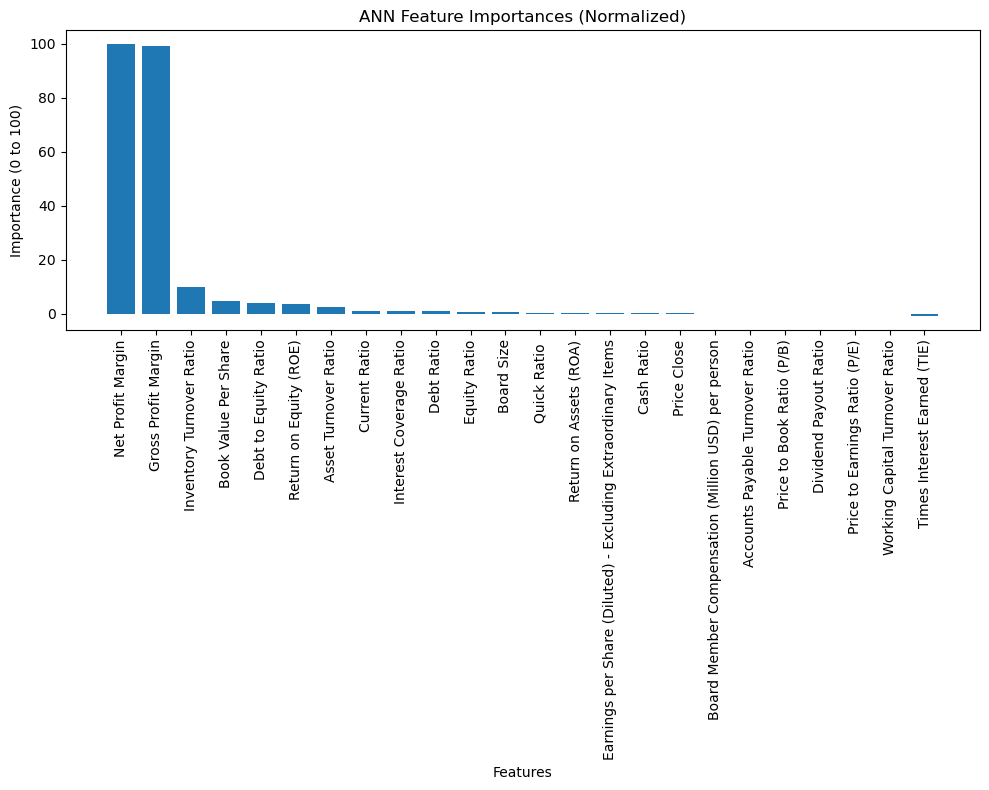

In [9]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a custom scoring function
def mse_scorer(model, X, y):
    y_pred = model.predict(X)
    return -mean_squared_error(y, y_pred)  # Negative because scikit-learn expects higher is better

# Calculate the permutation feature importance
result = permutation_importance(model, AN_X_test, AN_y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring=mse_scorer)

# Get feature importances and their standard deviations
feature_importances = result.importances_mean
feature_importance_std = result.importances_std

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Get feature names
feature_names = AN_X.columns

# Sort the feature importances in descending order
sorted_idx = normalized_importances.argsort()[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_importances = normalized_importances[sorted_idx]

# Plot the normalized feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.title('ANN Feature Importances (Normalized)')
plt.tight_layout()
plt.show()


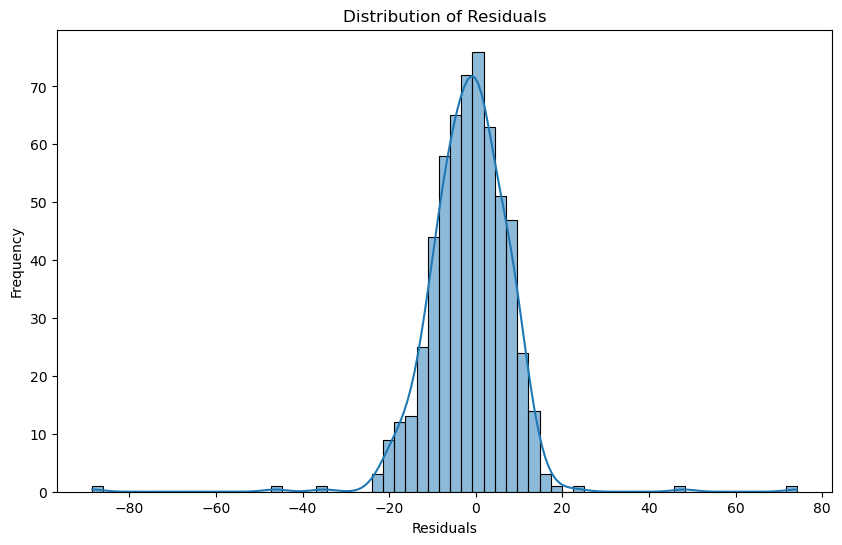

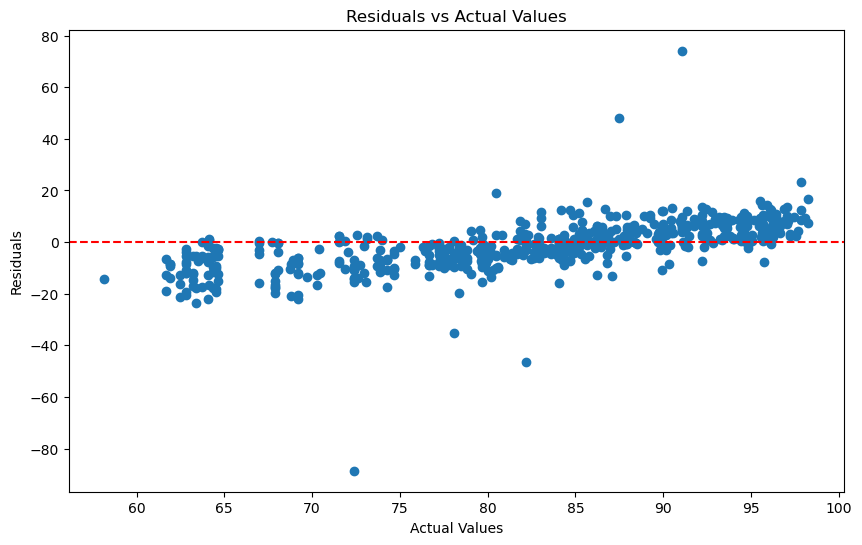

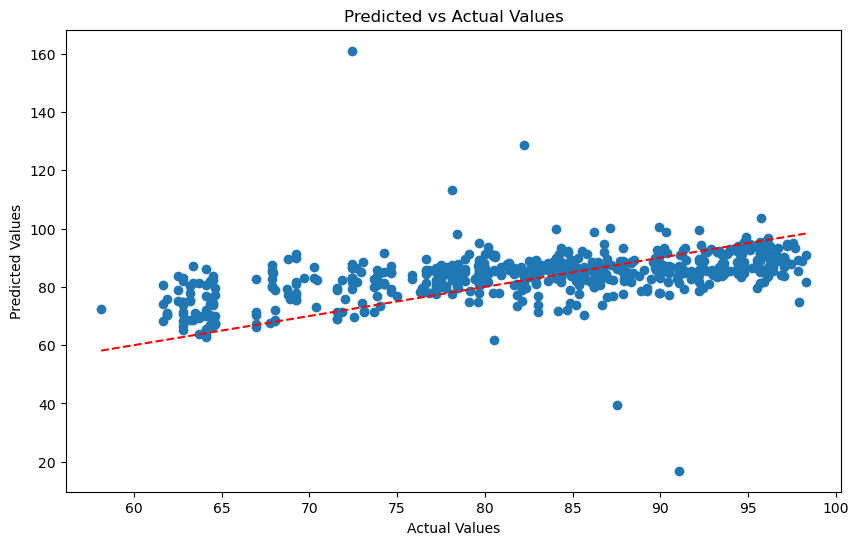

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.cluster import KMeans

# Calculate Residuals
AN_residuals = AN_y_test - AN_y_pred.flatten()

# Plot Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(AN_residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot Residuals vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(AN_y_test, AN_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# Plot Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(AN_y_test, AN_y_pred)
plt.plot([AN_y_test.min(), AN_y_test.max()], [AN_y_test.min(), AN_y_test.max()], 'r--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [3]:
##OLS

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt

# Load the data from Excel file
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
OLS_X = data.iloc[:, 4:28]
OLS_y = data.iloc[:, 3]

# Split the data into training and testing sets
OLS_X_train, OLS_X_test, OLS_y_train, OLS_y_test = train_test_split(OLS_X, OLS_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
OLS_X_train_scaled = scaler.fit_transform(OLS_X_train)
OLS_X_test_scaled = scaler.transform(OLS_X_test)

# Define the OLS model
ols = LinearRegression()

# Define a custom scorer for GridSearchCV to minimize RMSE
def rmse_scorer(OLS_y_true, OLS_y_pred):
    return np.sqrt(mean_squared_error(OLS_y_true, OLS_y_pred))

# Perform grid search with cross-validation (though for OLS there are no hyperparameters, this is illustrative)
param_grid = {}  # No hyperparameters to tune for OLS

grid_search = GridSearchCV(estimator=ols, param_grid=param_grid, scoring=make_scorer(rmse_scorer), cv=3, verbose=2)
grid_search.fit(OLS_X_train_scaled,OLS_y_train)

# Get the best model from grid search
best_ols = grid_search.best_estimator_

# Predict on the test set
OLS_y_pred = best_ols.predict(OLS_X_test_scaled)

# Calculate RMSE
OLS_rmse = np.sqrt(mean_squared_error(OLS_y_test, OLS_y_pred))
print(f'Best RMSE: {OLS_rmse}')

# Calculate Mean Squared Forecast Error (MSFE)
OLS_msfe = mean_squared_error(OLS_y_test, OLS_y_pred)
print(f'MSFE: {OLS_msfe}')

# Calculate out-of-sample R-squared (R^2_OS)
OLS_numerator = np.sum((OLS_y_test - OLS_y_pred) ** 2)
OLS_denominator = np.sum((OLS_y_test - np.mean(OLS_y_train)) ** 2)
OLS_r2_os = 1 - (OLS_numerator / OLS_denominator)
print(f'Out-of-sample R-squared: {OLS_r2_os}')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Best RMSE: 45.23195297582969
MSFE: 2045.9295700076689
Out-of-sample R-squared: -18.768550901482662


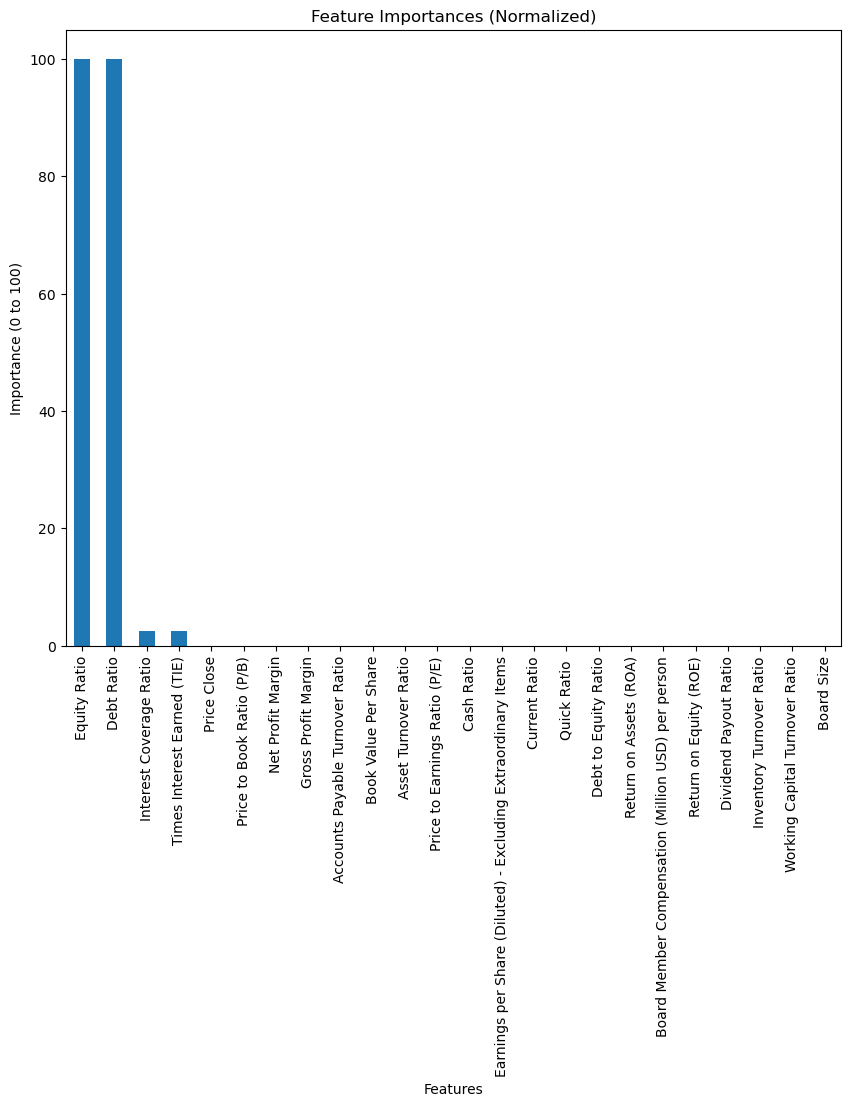

In [3]:
# Plot feature importances
importance = np.abs(best_ols.coef_)
feature_names = OLS_X.columns
feature_importances = pd.Series(importance, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances (Normalized)')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

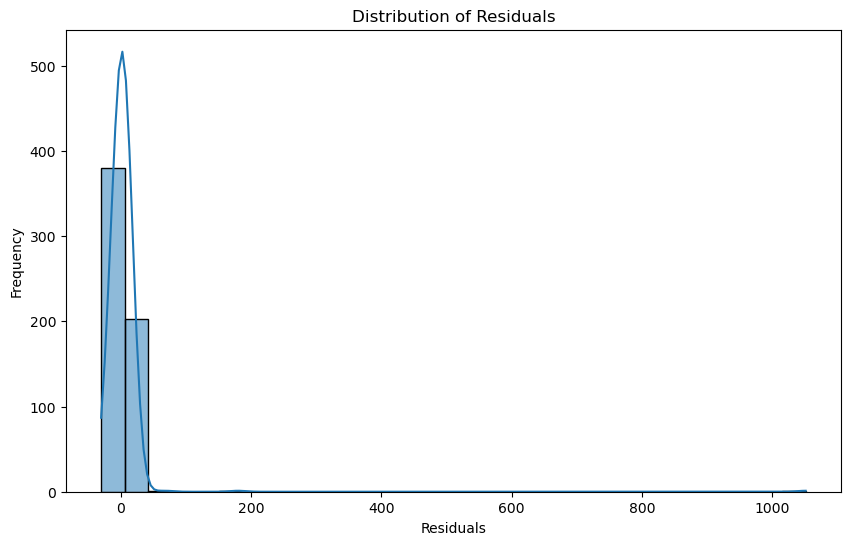

In [6]:
import seaborn as sns
# Calculate residuals
residuals = OLS_y_test - OLS_y_pred

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [5]:
##Lasso

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, make_scorer

# Load the data from Excel file
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
X = data.iloc[:, 4:28]
y = data.iloc[:, 3]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the LASSO model with increased max_iter
lasso = Lasso(max_iter=5000)  # Increased number of iterations

# Define a custom scorer for GridSearchCV to minimize RMSE
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Perform grid search with cross-validation
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # Different values for the regularization parameter
}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring=make_scorer(rmse_scorer), cv=3, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_lasso = grid_search.best_estimator_

# Predict on the test set
y_pred = best_lasso.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Best RMSE: {rmse}')

# Calculate Mean Squared Forecast Error (MSFE)
msfe = mean_squared_error(y_test, y_pred)
print(f'MSFE: {msfe}')

# Calculate out-of-sample R-squared (R^2_OS)
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_train)) ** 2)
r2_os = 1 - (numerator / denominator)
print(f'Out-of-sample R-squared: {r2_os}')

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ........................................

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the data from Excel file
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
X = data.iloc[:, 4:28]
y = data.iloc[:, 3]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LASSO model with the best hyperparameter
best_lasso = Lasso(alpha=0.001, max_iter=5000)

# Fit the model
best_lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_lasso.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Calculate Mean Squared Forecast Error (MSFE)
msfe = mean_squared_error(y_test, y_pred)
print(f'MSFE: {msfe}')

# Calculate out-of-sample R-squared (R^2_OS)
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_train)) ** 2)
r2_os = 1 - (numerator / denominator)
print(f'Out-of-sample R-squared: {r2_os}')


RMSE: 42.98216280267506
MSFE: 1847.4663191956636
Out-of-sample R-squared: -16.850923367639382


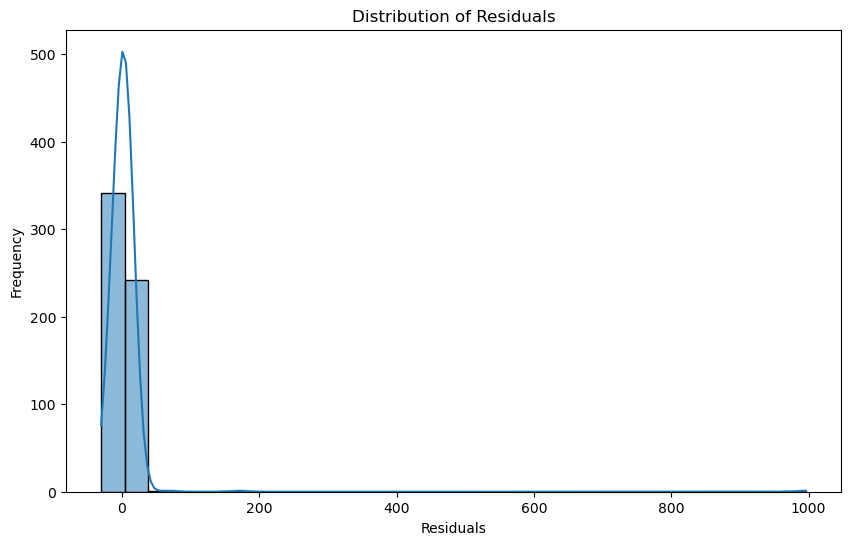

In [8]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

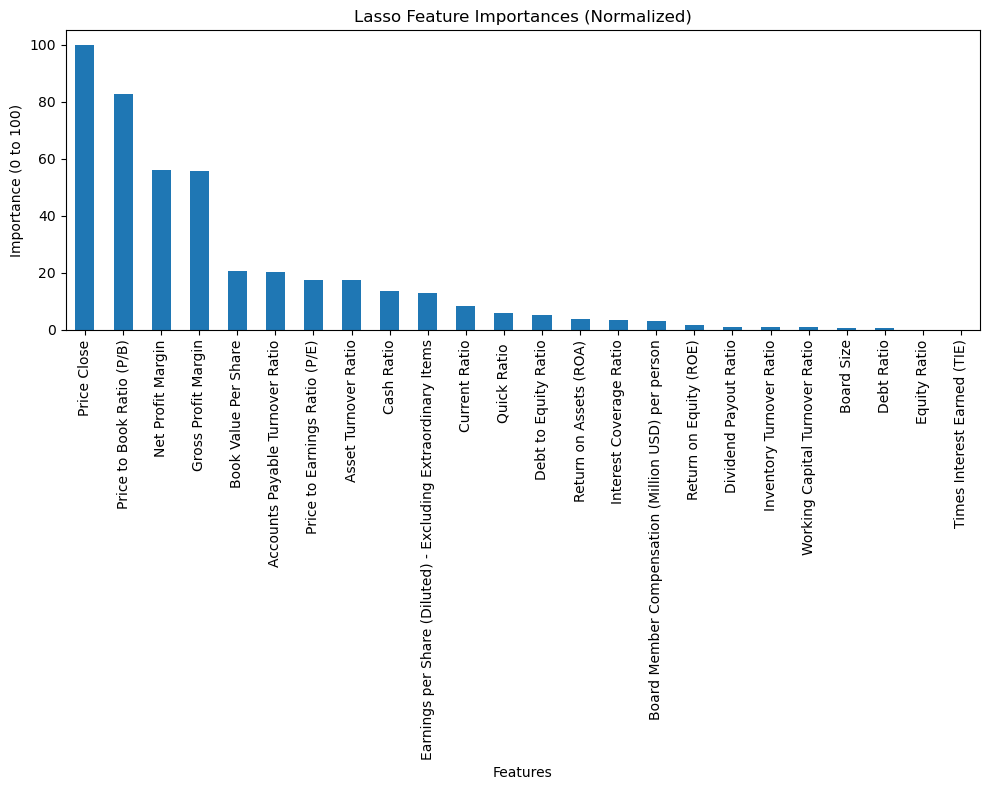

Number of features with importance greater than 5%: 13


In [4]:
import matplotlib.pyplot as plt

# Plot feature importances
importance = np.abs(best_lasso.coef_)
feature_names = X.columns
feature_importances = pd.Series(importance, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the normalized feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('Lasso Feature Importances (Normalized)')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.tight_layout()
plt.show()

# Count the number of features with importance greater than 5%
num_important_features = (normalized_importances > 5).sum()

# Display the number of important features
print("Number of features with importance greater than 5%:", num_important_features)

In [47]:
##Robustness test

In [ ]:
##RF

In [ ]:
#high tech

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset again
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter high-tech firms from 'Sheet1'
high_tech_firms = data[data['Category'] == 'Energy and industrials']

# Prepare the predictors (columns E to AC) and the target variable (column D)
HT_RF_X = high_tech_firms.iloc[:, 4:28]
HT_RF_y = high_tech_firms.iloc[:, 3]

# Split the data into training and testing sets
HT_RF_X_train, HT_RF_X_test, HT_RF_y_train, HT_RF_y_test = train_test_split(HT_RF_X, HT_RF_y, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies the Random Forest Regressor
HT_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
HT_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Set up the GridSearchCV to find the best parameters
HT_grid_search = GridSearchCV(estimator=HT_pipeline, param_grid=HT_param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
HT_grid_search.fit(HT_RF_X_train, HT_RF_y_train)

# Get the best parameters and the best model
HT_best_params = HT_grid_search.best_params_
HT_best_model = HT_grid_search.best_estimator_

# Predict the values for the test set
HT_RF_y_pred = HT_best_model.predict(HT_RF_X_test)

# Calculate RMSE
HT_RF_rmse = np.sqrt(mean_squared_error(HT_RF_y_test, HT_RF_y_pred))

# Calculate Mean Squared Forecast Error (MSFE)
HT_RF_msfe = mean_squared_error(HT_RF_y_test, HT_RF_y_pred)

# Calculate out-of-sample R-squared (R^2_OS)
HT_numerator = np.sum((HT_RF_y_test - HT_RF_y_pred) ** 2)
HT_denominator = np.sum((HT_RF_y_test - np.mean(HT_RF_y_train)) ** 2)
HT_RF_r2_os = 1 - (HT_numerator / HT_denominator)

# Print the best parameters, RMSE, MSFE, and out-of-sample R-squared value for high-tech firms
HT_best_params, HT_RF_rmse, HT_RF_msfe, HT_RF_r2_os

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


({'rf__bootstrap': False,
  'rf__max_depth': 30,
  'rf__max_features': 'sqrt',
  'rf__min_samples_leaf': 1,
  'rf__min_samples_split': 2,
  'rf__n_estimators': 300},
 5.415899329403021,
 29.331965546228087,
 0.6400772865990082)

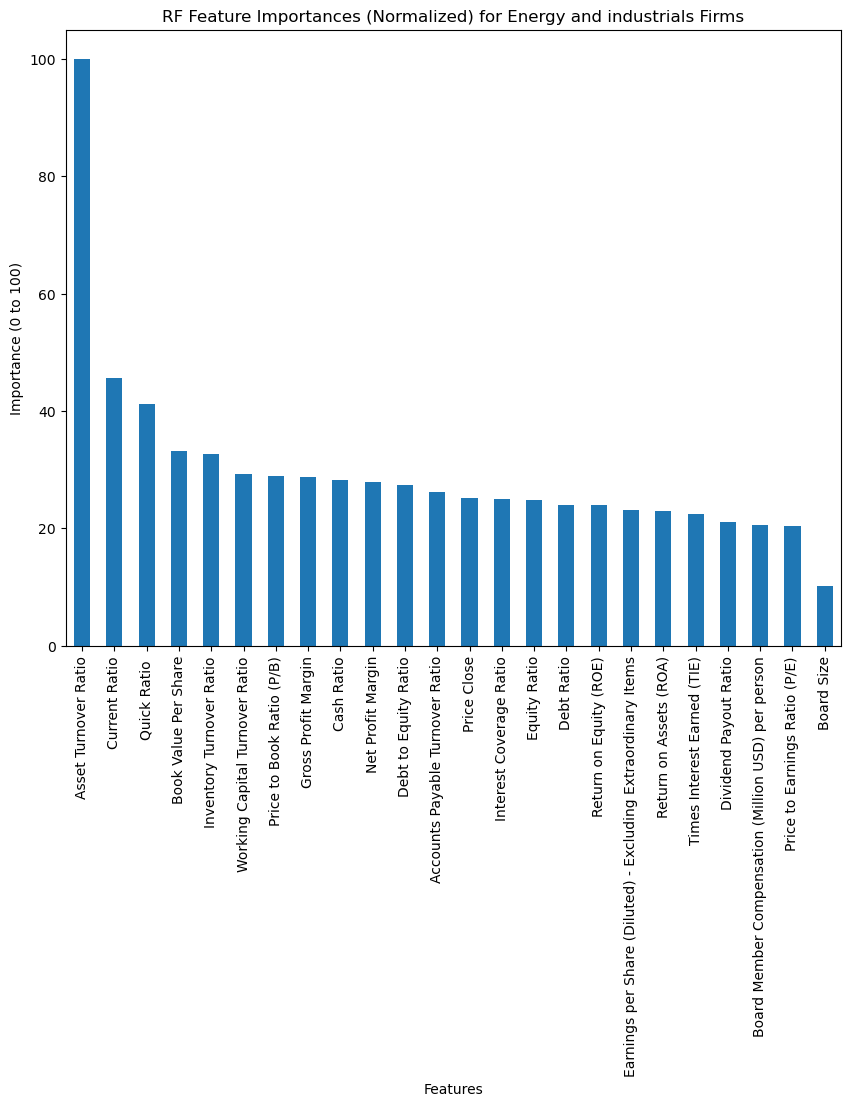

In [4]:
# Calculate feature importances
importances = HT_best_model.named_steps['rf'].feature_importances_
feature_names = HT_RF_X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('RF Feature Importances (Normalized) for Energy and industrials Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

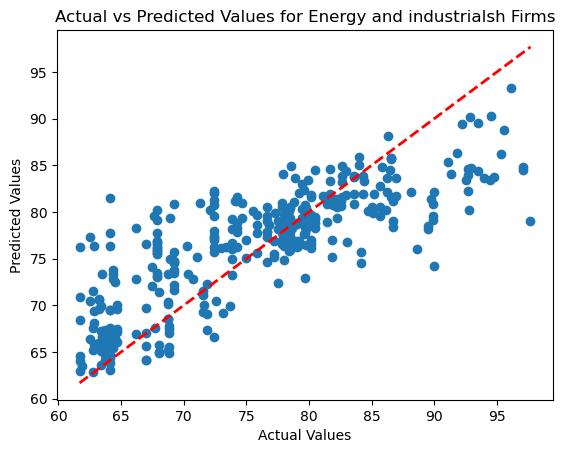

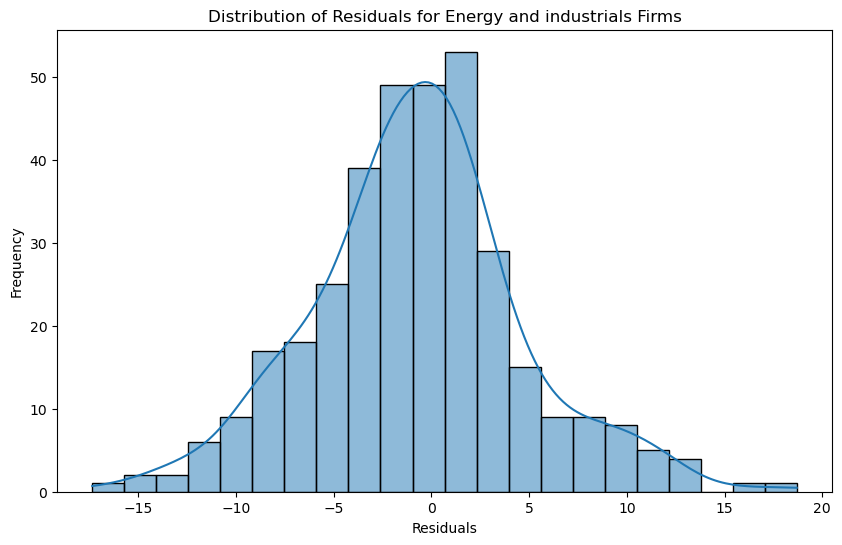

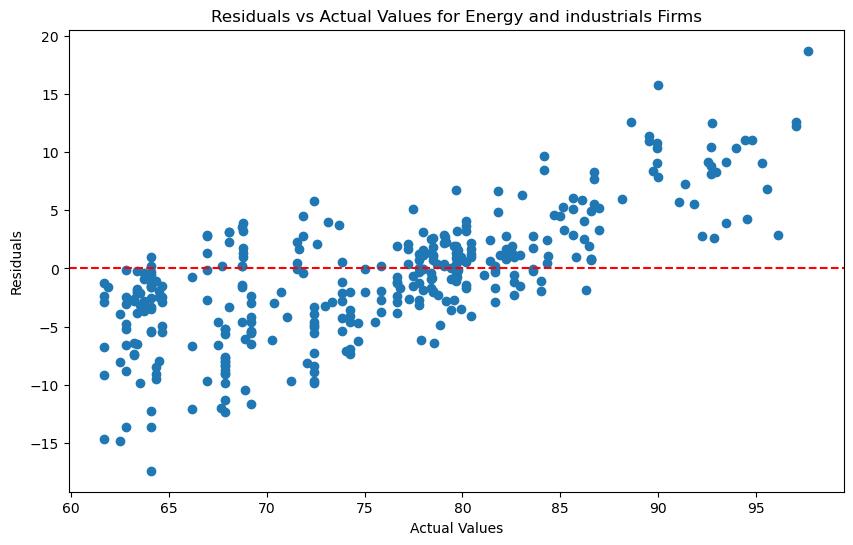

In [5]:
# Plot predicted vs actual values
plt.scatter(HT_RF_y_test, HT_RF_y_pred)
plt.plot([HT_RF_y_test.min(), HT_RF_y_test.max()], [HT_RF_y_test.min(), HT_RF_y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Energy and industrialsh Firms')
plt.show()

# Calculate residuals
HT_RF_residuals = HT_RF_y_test - HT_RF_y_pred

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(HT_RF_residuals, kde=True)
plt.title("Distribution of Residuals for Energy and industrials Firms")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot residuals vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(HT_RF_y_test, HT_RF_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Values for Energy and industrials Firms')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [6]:
#Non high tech

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'rf__bootstrap': False, 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Root Mean Squared Error (RMSE): 3.5904056245964155
Mean Squared Forecast Error (MSFE): 12.891012549133578
Out-of-sample R-squared (R^2_OS): 0.6445030086587316


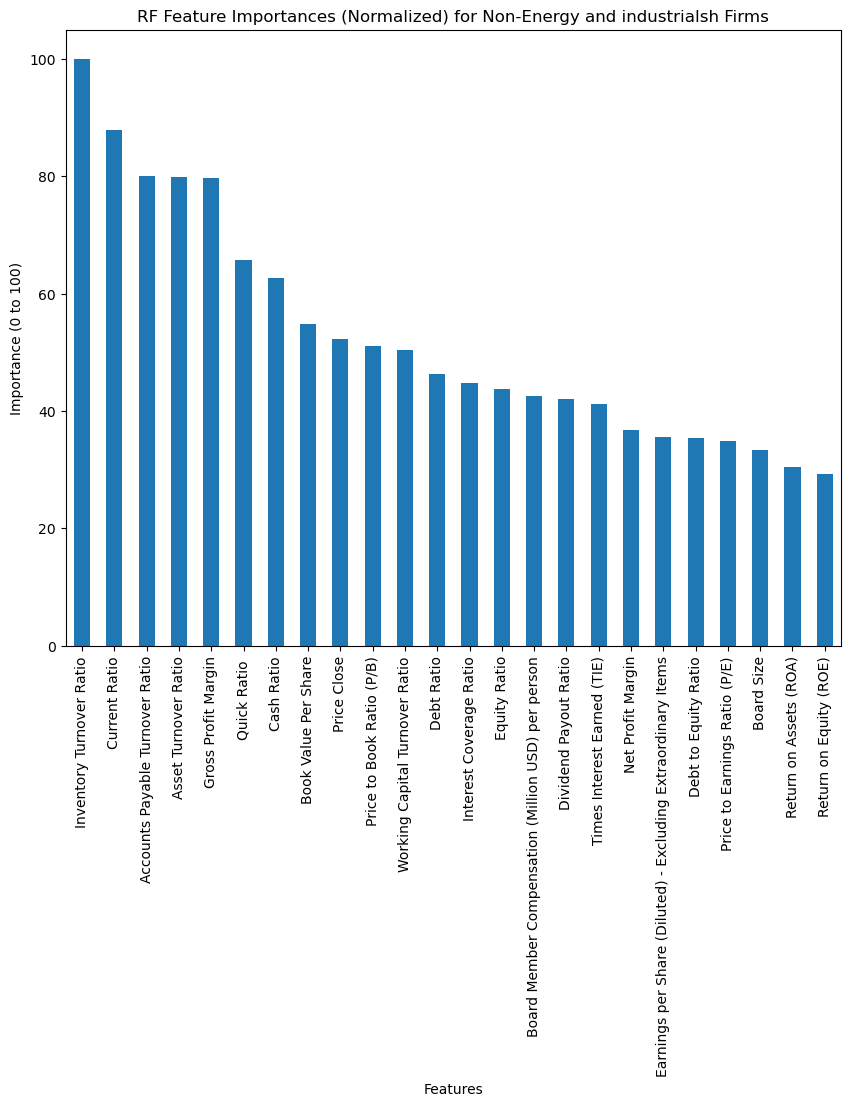

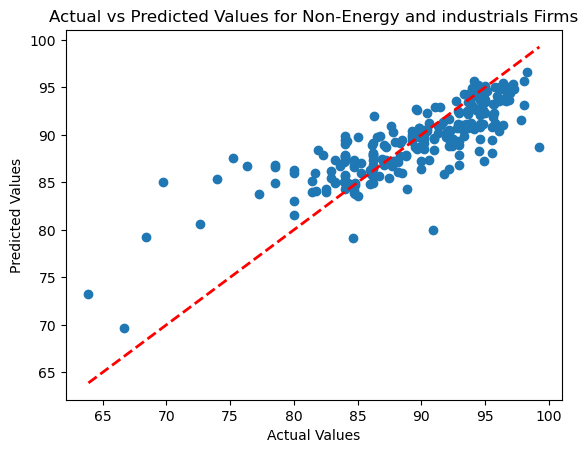

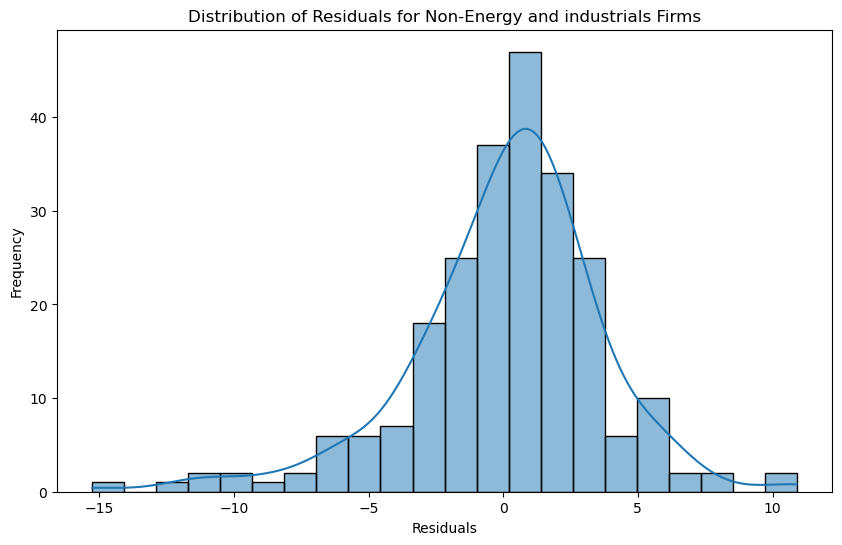

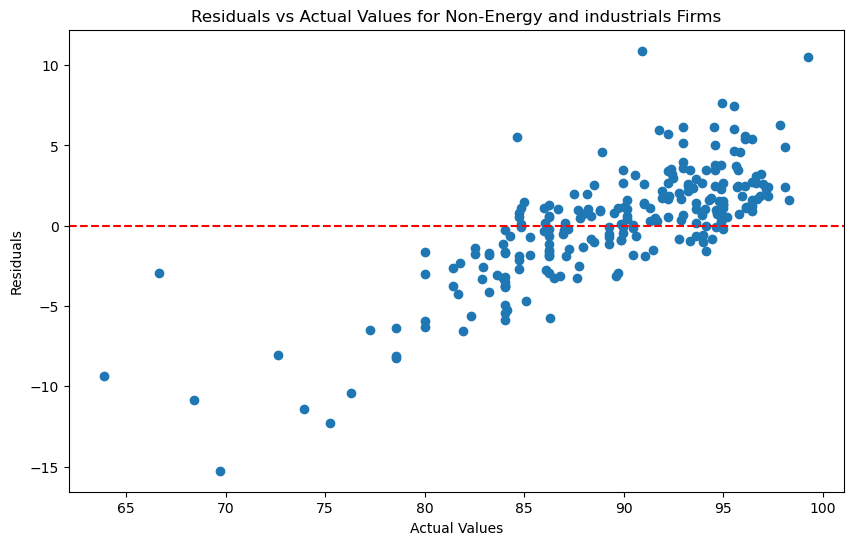

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter non-high-tech firms from 'Sheet1'
non_high_tech_firms = data[data['Category'] == 'Non']

# Prepare the predictors (columns E to AC) and the target variable (column D)
NHT_RF_X = non_high_tech_firms.iloc[:, 4:28]
NHT_RF_y = non_high_tech_firms.iloc[:, 3]

# Split the data into training and testing sets
NHT_RF_X_train, NHT_RF_X_test, NHT_RF_y_train, NHT_RF_y_test = train_test_split(NHT_RF_X, NHT_RF_y, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies the Random Forest Regressor
NHT_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
NHT_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Set up the GridSearchCV to find the best parameters
NHT_grid_search = GridSearchCV(estimator=NHT_pipeline, param_grid=NHT_param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
NHT_grid_search.fit(NHT_RF_X_train, NHT_RF_y_train)

# Get the best parameters and the best model
NHT_best_params = NHT_grid_search.best_params_
NHT_best_model = NHT_grid_search.best_estimator_

# Predict the values for the test set
NHT_RF_y_pred = NHT_best_model.predict(NHT_RF_X_test)

# Calculate RMSE
NHT_RF_rmse = np.sqrt(mean_squared_error(NHT_RF_y_test, NHT_RF_y_pred))

# Calculate Mean Squared Forecast Error (MSFE)
NHT_RF_msfe = mean_squared_error(NHT_RF_y_test, NHT_RF_y_pred)

# Calculate out-of-sample R-squared (R^2_OS)
NHT_numerator = np.sum((NHT_RF_y_test - NHT_RF_y_pred) ** 2)
NHT_denominator = np.sum((NHT_RF_y_test - np.mean(NHT_RF_y_train)) ** 2)
NHT_RF_r2_os = 1 - (NHT_numerator / NHT_denominator)

# Print the best parameters, RMSE, MSFE, and out-of-sample R-squared value for non-high-tech firms
print("Best Parameters:", NHT_best_params)
print("Root Mean Squared Error (RMSE):", NHT_RF_rmse)
print("Mean Squared Forecast Error (MSFE):", NHT_RF_msfe)
print("Out-of-sample R-squared (R^2_OS):", NHT_RF_r2_os)

# Calculate feature importances
importances = NHT_best_model.named_steps['rf'].feature_importances_
feature_names = NHT_RF_X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('RF Feature Importances (Normalized) for Non-Energy and industrialsh Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

# Plot predicted vs actual values
plt.scatter(NHT_RF_y_test, NHT_RF_y_pred)
plt.plot([NHT_RF_y_test.min(), NHT_RF_y_test.max()], [NHT_RF_y_test.min(), NHT_RF_y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Non-Energy and industrials Firms')
plt.show()

# Calculate residuals
NHT_RF_residuals = NHT_RF_y_test - NHT_RF_y_pred

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(NHT_RF_residuals, kde=True)
plt.title("Distribution of Residuals for Non-Energy and industrials Firms")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot residuals vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(NHT_RF_y_test, NHT_RF_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Values for Non-Energy and industrials Firms')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
#XG energy

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 300, 'xgb__subsample': 0.7}
Root Mean Squared Error (RMSE): 5.088473106961605
Mean Squared Forecast Error (MSFE): 25.892558560271496
Out-of-sample R-squared (R^2_OS): 0.6822810963956896


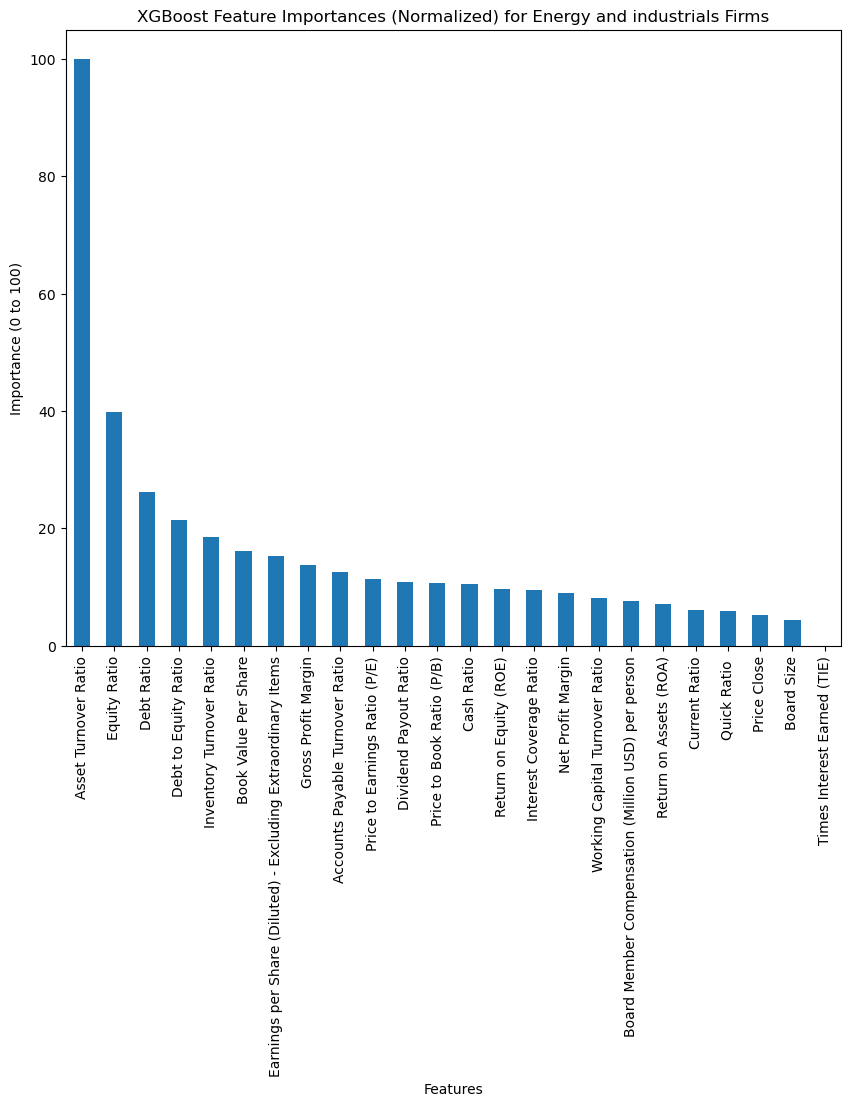

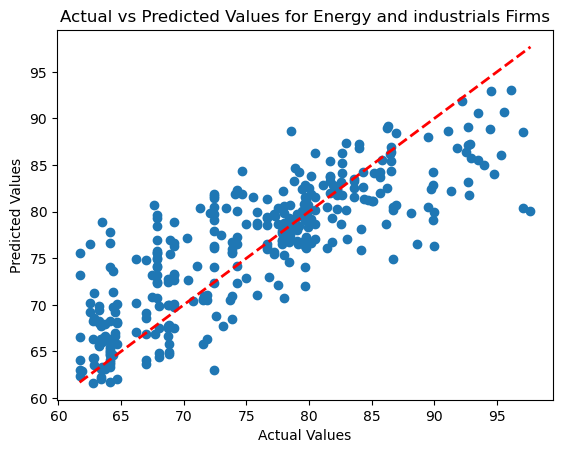

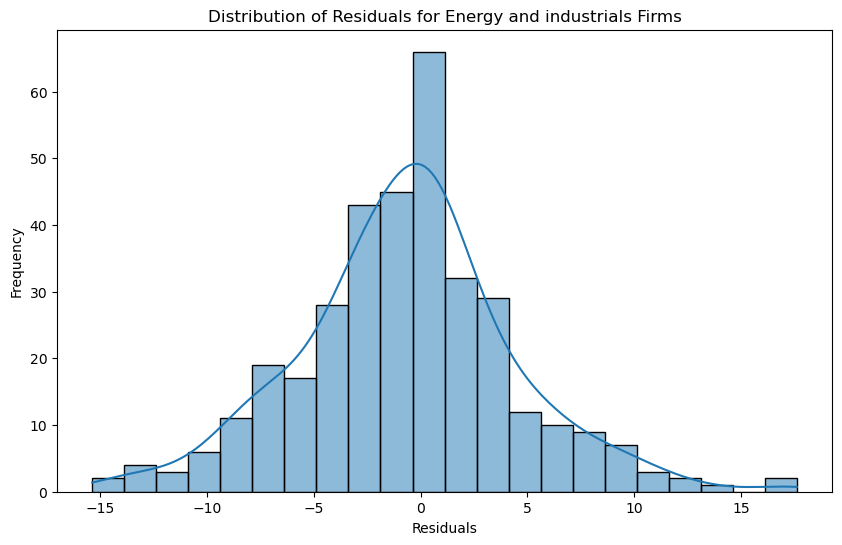

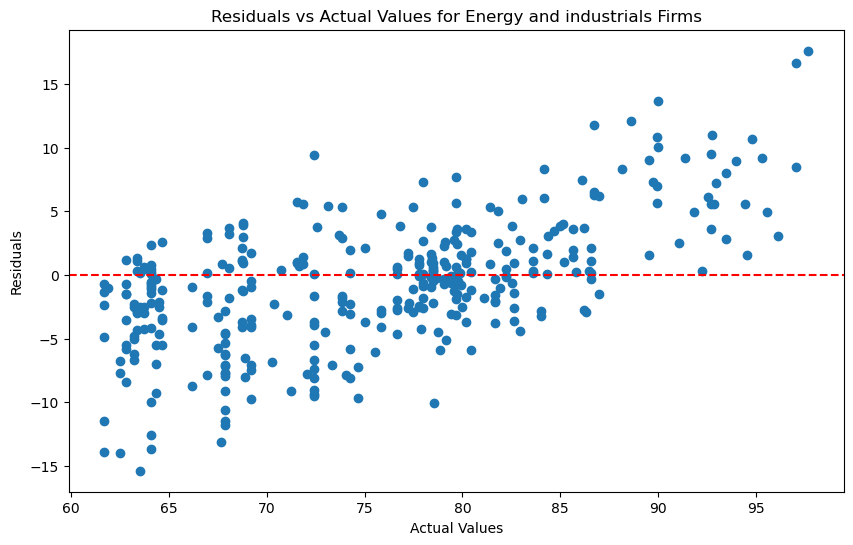

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Load the dataset again
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter Energy and industrials firms from 'Sheet1'
energy_industrials_firms = data[data['Category'] == 'Energy and industrials']

# Prepare the predictors (columns E to AC) and the target variable (column D)
EIT_X = energy_industrials_firms.iloc[:, 4:28]
EIT_y = energy_industrials_firms.iloc[:, 3]

# Split the data into training and testing sets
EIT_X_train, EIT_X_test, EIT_y_train, EIT_y_test = train_test_split(EIT_X, EIT_y, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies the XGBoost Regressor
EIT_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
EIT_param_grid = {
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__subsample': [0.7, 0.8, 0.9]
}

# Set up the GridSearchCV to find the best parameters
EIT_grid_search = GridSearchCV(estimator=EIT_pipeline, param_grid=EIT_param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
EIT_grid_search.fit(EIT_X_train, EIT_y_train)

# Get the best parameters and the best model
EIT_best_params = EIT_grid_search.best_params_
EIT_best_model = EIT_grid_search.best_estimator_

# Predict the values for the test set
EIT_y_pred = EIT_best_model.predict(EIT_X_test)

# Calculate RMSE
EIT_rmse = np.sqrt(mean_squared_error(EIT_y_test, EIT_y_pred))

# Calculate Mean Squared Forecast Error (MSFE)
EIT_msfe = mean_squared_error(EIT_y_test, EIT_y_pred)

# Calculate out-of-sample R-squared (R^2_OS)
EIT_numerator = np.sum((EIT_y_test - EIT_y_pred) ** 2)
EIT_denominator = np.sum((EIT_y_test - np.mean(EIT_y_train)) ** 2)
EIT_r2_os = 1 - (EIT_numerator / EIT_denominator)

# Print the best parameters, RMSE, MSFE, and out-of-sample R-squared value for Energy and industrials firms
print("Best Parameters:", EIT_best_params)
print("Root Mean Squared Error (RMSE):", EIT_rmse)
print("Mean Squared Forecast Error (MSFE):", EIT_msfe)
print("Out-of-sample R-squared (R^2_OS):", EIT_r2_os)

# Calculate feature importances
importances = EIT_best_model.named_steps['xgb'].feature_importances_
feature_names = EIT_X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('XGBoost Feature Importances (Normalized) for Energy and industrials Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

# Plot predicted vs actual values
plt.scatter(EIT_y_test, EIT_y_pred)
plt.plot([EIT_y_test.min(), EIT_y_test.max()], [EIT_y_test.min(), EIT_y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Energy and industrials Firms')
plt.show()

# Calculate residuals
EIT_residuals = EIT_y_test - EIT_y_pred

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(EIT_residuals, kde=True)
plt.title("Distribution of Residuals for Energy and industrials Firms")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot residuals vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(EIT_y_test, EIT_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Values for Energy and industrials Firms')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
#XG no energy

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 300, 'xgb__subsample': 0.7}
Root Mean Squared Error (RMSE): 3.4836943837240684
Mean Squared Forecast Error (MSFE): 12.136126559190616
Out-of-sample R-squared (R^2_OS): 0.6653205896833063


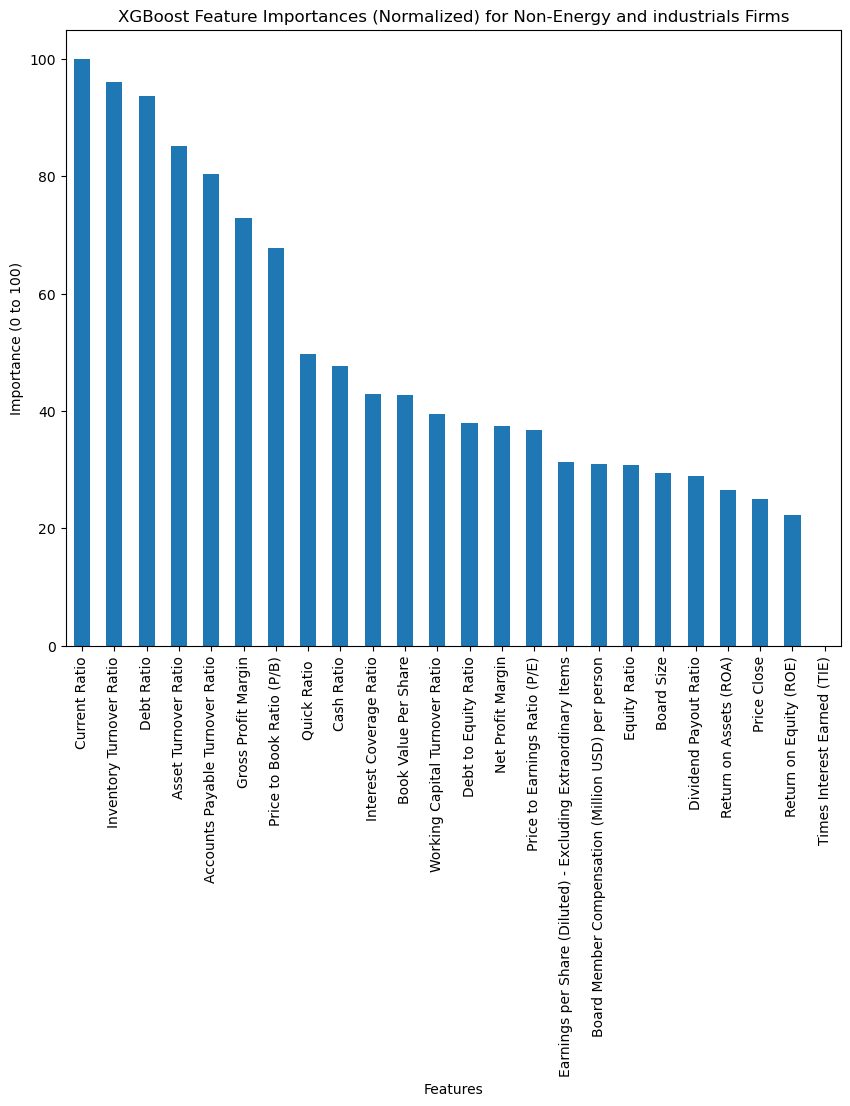

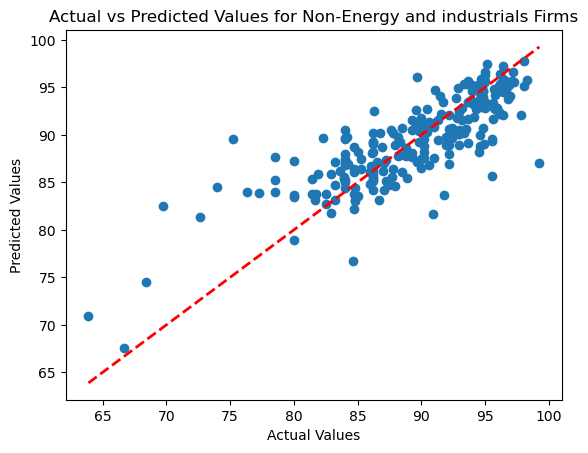

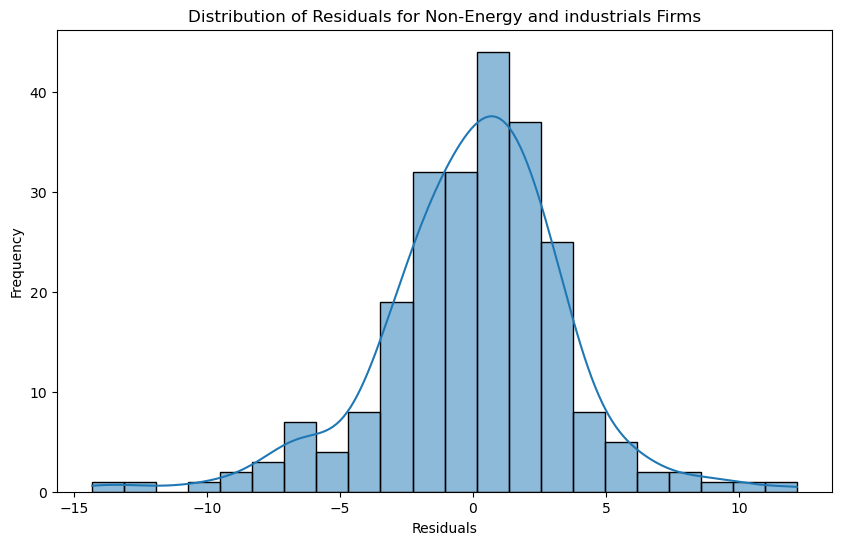

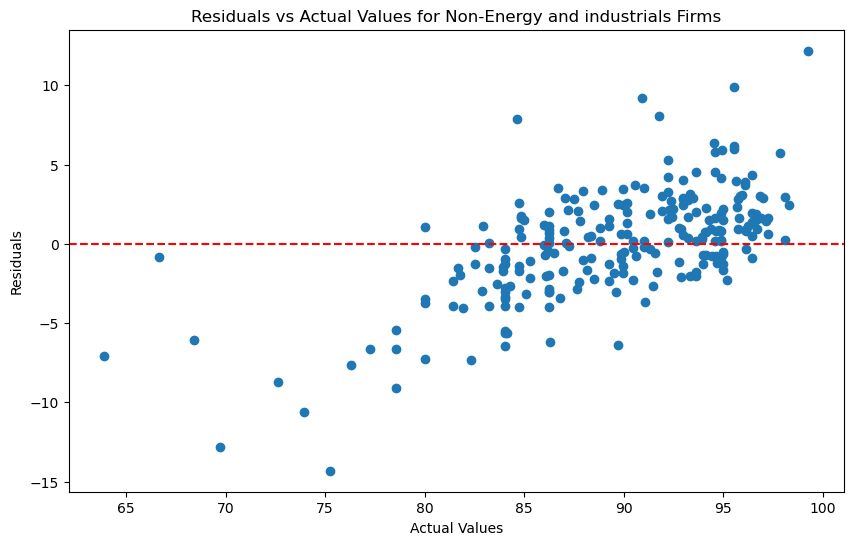

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Load the dataset again
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter Non-Energy and industrials firms from 'Sheet1'
non_energy_industrials_firms = data[data['Category'] == 'Non']

# Prepare the predictors (columns E to AC) and the target variable (column D)
NEI_X = non_energy_industrials_firms.iloc[:, 4:28]
NEI_y = non_energy_industrials_firms.iloc[:, 3]

# Split the data into training and testing sets
NEI_X_train, NEI_X_test, NEI_y_train, NEI_y_test = train_test_split(NEI_X, NEI_y, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies the XGBoost Regressor
NEI_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
NEI_param_grid = {
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__subsample': [0.7, 0.8, 0.9]
}

# Set up the GridSearchCV to find the best parameters
NEI_grid_search = GridSearchCV(estimator=NEI_pipeline, param_grid=NEI_param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
NEI_grid_search.fit(NEI_X_train, NEI_y_train)

# Get the best parameters and the best model
NEI_best_params = NEI_grid_search.best_params_
NEI_best_model = NEI_grid_search.best_estimator_

# Predict the values for the test set
NEI_y_pred = NEI_best_model.predict(NEI_X_test)

# Calculate RMSE
NEI_rmse = np.sqrt(mean_squared_error(NEI_y_test, NEI_y_pred))

# Calculate Mean Squared Forecast Error (MSFE)
NEI_msfe = mean_squared_error(NEI_y_test, NEI_y_pred)

# Calculate out-of-sample R-squared (R^2_OS)
NEI_numerator = np.sum((NEI_y_test - NEI_y_pred) ** 2)
NEI_denominator = np.sum((NEI_y_test - np.mean(NEI_y_train)) ** 2)
NEI_r2_os = 1 - (NEI_numerator / NEI_denominator)

# Print the best parameters, RMSE, MSFE, and out-of-sample R-squared value for Non-Energy and industrials firms
print("Best Parameters:", NEI_best_params)
print("Root Mean Squared Error (RMSE):", NEI_rmse)
print("Mean Squared Forecast Error (MSFE):", NEI_msfe)
print("Out-of-sample R-squared (R^2_OS):", NEI_r2_os)

# Calculate feature importances
importances = NEI_best_model.named_steps['xgb'].feature_importances_
feature_names = NEI_X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('XGBoost Feature Importances (Normalized) for Non-Energy and industrials Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

# Plot predicted vs actual values
plt.scatter(NEI_y_test, NEI_y_pred)
plt.plot([NEI_y_test.min(), NEI_y_test.max()], [NEI_y_test.min(), NEI_y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Non-Energy and industrials Firms')
plt.show()

# Calculate residuals
NEI_residuals = NEI_y_test - NEI_y_pred

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(NEI_residuals, kde=True)
plt.title("Distribution of Residuals for Non-Energy and industrials Firms")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot residuals vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(NEI_y_test, NEI_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Values for Non-Energy and industrials Firms')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
#low_growth firm

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again from the new file
file_path_new = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data_new = pd.read_excel(file_path_new, sheet_name='Sheet1')

# Filter low-growth firms from the 'Growth Category' column
low_growth_firms_new = data_new[data_new['Growth Category'] == 'Low-Growth Firm']

# Prepare the predictors (columns E to AC) and the target variable (column D)
LG_RF_X_new = low_growth_firms_new.iloc[:, 4:28]
LG_RF_y_new = low_growth_firms_new.iloc[:, 3]

# Split the data into training and testing sets
LG_RF_X_train_new, LG_RF_X_test_new, LG_RF_y_train_new, LG_RF_y_test_new = train_test_split(LG_RF_X_new, LG_RF_y_new, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies the Random Forest Regressor
LG_pipeline_new = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
LG_param_grid_new = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Set up the GridSearchCV to find the best parameters
LG_grid_search_new = GridSearchCV(estimator=LG_pipeline_new, param_grid=LG_param_grid_new, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
LG_grid_search_new.fit(LG_RF_X_train_new, LG_RF_y_train_new)

# Get the best parameters and the best model
LG_best_params_new = LG_grid_search_new.best_params_
LG_best_model_new = LG_grid_search_new.best_estimator_

# Predict the values for the test set
LG_RF_y_pred_new = LG_best_model_new.predict(LG_RF_X_test_new)

# Calculate RMSE
LG_RF_rmse_new = np.sqrt(mean_squared_error(LG_RF_y_test_new, LG_RF_y_pred_new))

# Calculate Mean Squared Forecast Error (MSFE)
LG_RF_msfe_new = mean_squared_error(LG_RF_y_test_new, LG_RF_y_pred_new)

# Calculate out-of-sample R-squared (R^2_OS)
LG_numerator_new = np.sum((LG_RF_y_test_new - LG_RF_y_pred_new) ** 2)
LG_denominator_new = np.sum((LG_RF_y_test_new - np.mean(LG_RF_y_train_new)) ** 2)
LG_RF_r2_os_new = 1 - (LG_numerator_new / LG_denominator_new)

# Output the best parameters, RMSE, MSFE, and out-of-sample R-squared value for low-growth firms
LG_best_params_new, LG_RF_rmse_new, LG_RF_msfe_new, LG_RF_r2_os_new


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


({'rf__bootstrap': False,
  'rf__max_depth': 30,
  'rf__max_features': 'sqrt',
  'rf__min_samples_leaf': 1,
  'rf__min_samples_split': 2,
  'rf__n_estimators': 100},
 6.503630130302303,
 42.29720487177596,
 0.5453655900727552)

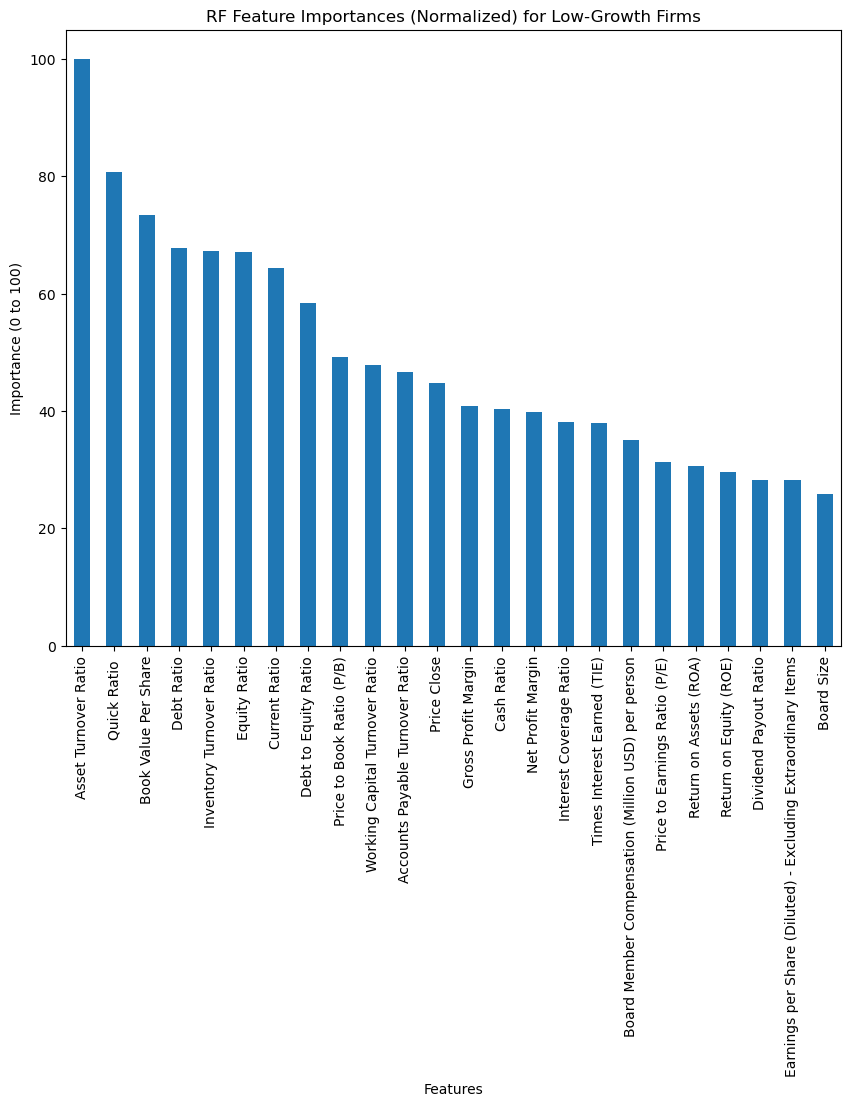

In [4]:
# Calculate feature importances
importances = LG_best_model_new.named_steps['rf'].feature_importances_
feature_names = LG_RF_X_new.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('RF Feature Importances (Normalized) for Low-Growth Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

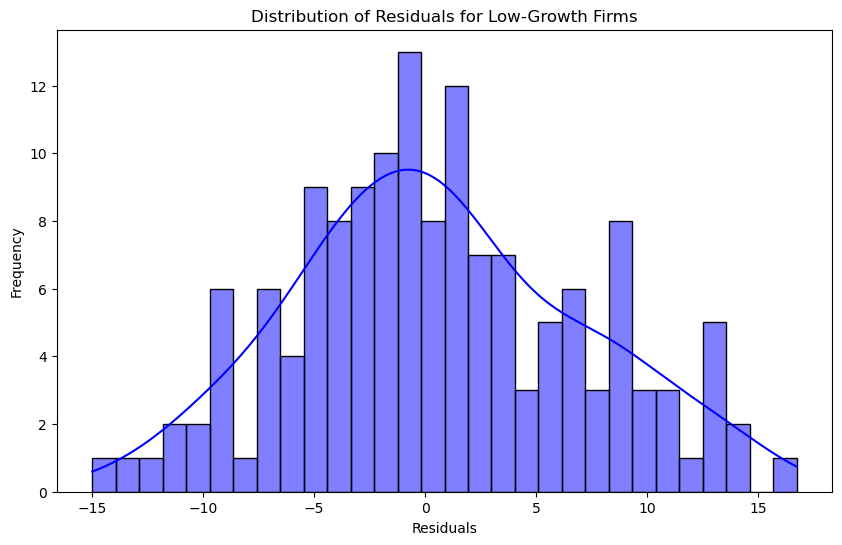

In [14]:
# Calculate residuals
LG_residuals_new = LG_RF_y_test_new - LG_RF_y_pred_new
# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(LG_residuals_new, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals for Low-Growth Firms')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#medium_growth firm

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again from the new file
file_path_new = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data_new = pd.read_excel(file_path_new, sheet_name='Sheet1')

# Filter low-growth firms from the 'Growth Category' column
Medium_growth_firms_new = data_new[data_new['Growth Category'] == 'Medium-Growth Firm']

# Prepare the predictors (columns E to AC) and the target variable (column D)
MG_RF_X_new = Medium_growth_firms_new.iloc[:, 4:28]
MG_RF_y_new = Medium_growth_firms_new.iloc[:, 3]

# Split the data into training and testing sets
MG_RF_X_train_new,MG_RF_X_test_new, MG_RF_y_train_new, MG_RF_y_test_new = train_test_split(MG_RF_X_new, MG_RF_y_new, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies the Random Forest Regressor
MG_pipeline_new = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
MG_param_grid_new = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Set up the GridSearchCV to find the best parameters
MG_grid_search_new = GridSearchCV(estimator=MG_pipeline_new, param_grid=MG_param_grid_new, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
MG_grid_search_new.fit(MG_RF_X_train_new, MG_RF_y_train_new)

# Get the best parameters and the best model
MG_best_params_new = MG_grid_search_new.best_params_
MG_best_model_new = MG_grid_search_new.best_estimator_

# Predict the values for the test set
MG_RF_y_pred_new = MG_best_model_new.predict(MG_RF_X_test_new)

# Calculate RMSE
MG_RF_rmse_new = np.sqrt(mean_squared_error(MG_RF_y_test_new, MG_RF_y_pred_new))

# Calculate Mean Squared Forecast Error (MSFE)
MG_RF_msfe_new = mean_squared_error(MG_RF_y_test_new, MG_RF_y_pred_new)

# Calculate out-of-sample R-squared (R^2_OS)
MG_numerator_new = np.sum((MG_RF_y_test_new - MG_RF_y_pred_new) ** 2)
MG_denominator_new = np.sum((MG_RF_y_test_new - np.mean(MG_RF_y_train_new)) ** 2)
MG_RF_r2_os_new = 1 - (MG_numerator_new / MG_denominator_new)

# Output the best parameters, RMSE, MSFE, and out-of-sample R-squared value for low-growth firms
MG_best_params_new, MG_RF_rmse_new, MG_RF_msfe_new, MG_RF_r2_os_new

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


({'rf__bootstrap': True,
  'rf__max_depth': 20,
  'rf__max_features': None,
  'rf__min_samples_leaf': 1,
  'rf__min_samples_split': 2,
  'rf__n_estimators': 200},
 5.549501114905899,
 30.796962624341816,
 0.7119117875650196)

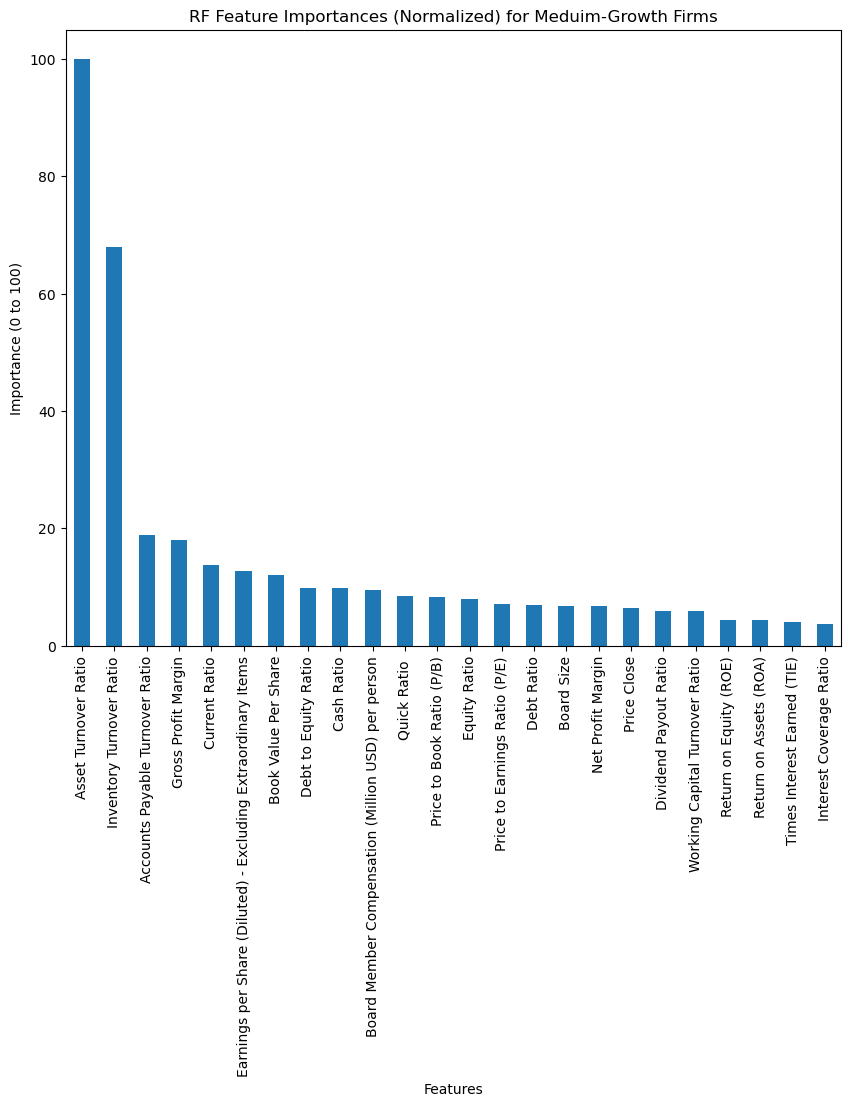

In [5]:
# Calculate feature importances
importances = MG_best_model_new.named_steps['rf'].feature_importances_
feature_names = MG_RF_X_new.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('RF Feature Importances (Normalized) for Meduim-Growth Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

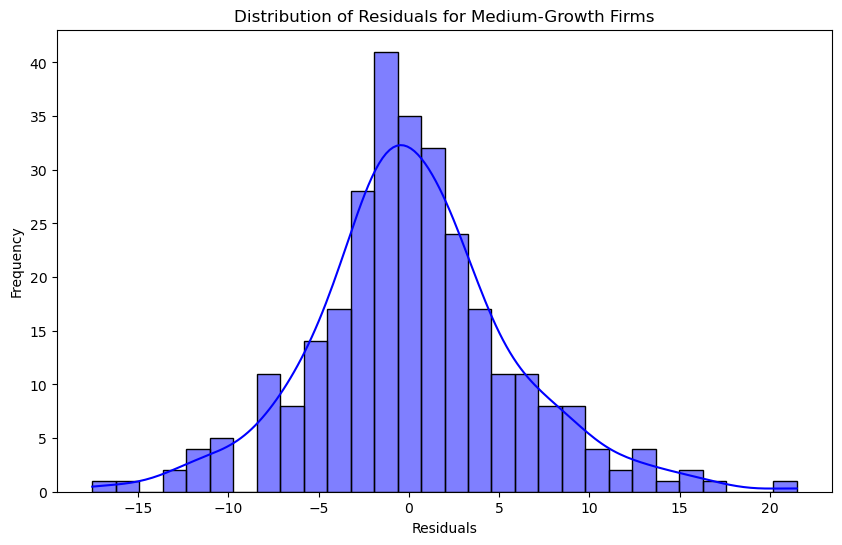

In [16]:
# Calculate residuals
MG_residuals_new = MG_RF_y_test_new - MG_RF_y_pred_new
# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(MG_residuals_new, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals for Medium-Growth Firms')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#high_growth firm

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again from the new file
file_path_new = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data_new = pd.read_excel(file_path_new, sheet_name='Sheet1')

# Filter low-growth firms from the 'Growth Category' column
High_growth_firms_new = data_new[data_new['Growth Category'] == 'High-Growth Firm']

# Prepare the predictors (columns E to AC) and the target variable (column D)
HG_RF_X_new = High_growth_firms_new.iloc[:, 4:28]
HG_RF_y_new = High_growth_firms_new.iloc[:, 3]

# Split the data into training and testing sets
HG_RF_X_train_new,HG_RF_X_test_new,HG_RF_y_train_new, HG_RF_y_test_new = train_test_split(HG_RF_X_new, HG_RF_y_new, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies the Random Forest Regressor
HG_pipeline_new = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
HG_param_grid_new = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Set up the GridSearchCV to find the best parameters
HG_grid_search_new = GridSearchCV(estimator=HG_pipeline_new, param_grid=HG_param_grid_new, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the model
HG_grid_search_new.fit(HG_RF_X_train_new, HG_RF_y_train_new)

# Get the best parameters and the best model
HG_best_params_new = HG_grid_search_new.best_params_
HG_best_model_new = HG_grid_search_new.best_estimator_

# Predict the values for the test set
HG_RF_y_pred_new = HG_best_model_new.predict(HG_RF_X_test_new)

# Calculate RMSE
HG_RF_rmse_new = np.sqrt(mean_squared_error(HG_RF_y_test_new, HG_RF_y_pred_new))

# Calculate Mean Squared Forecast Error (MSFE)
HG_RF_msfe_new = mean_squared_error(HG_RF_y_test_new, HG_RF_y_pred_new)

# Calculate out-of-sample R-squared (R^2_OS)
HG_numerator_new = np.sum((HG_RF_y_test_new - HG_RF_y_pred_new) ** 2)
HG_denominator_new = np.sum((HG_RF_y_test_new - np.mean(HG_RF_y_train_new)) ** 2)
HG_RF_r2_os_new = 1 - (HG_numerator_new / HG_denominator_new)

# Output the best parameters, RMSE, MSFE, and out-of-sample R-squared value for low-growth firms
HG_best_params_new, HG_RF_rmse_new, HG_RF_msfe_new, HG_RF_r2_os_new

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


({'rf__bootstrap': False,
  'rf__max_depth': None,
  'rf__max_features': 'sqrt',
  'rf__min_samples_leaf': 1,
  'rf__min_samples_split': 2,
  'rf__n_estimators': 200},
 4.513147862416407,
 20.368503628033782,
 0.6099593555121949)

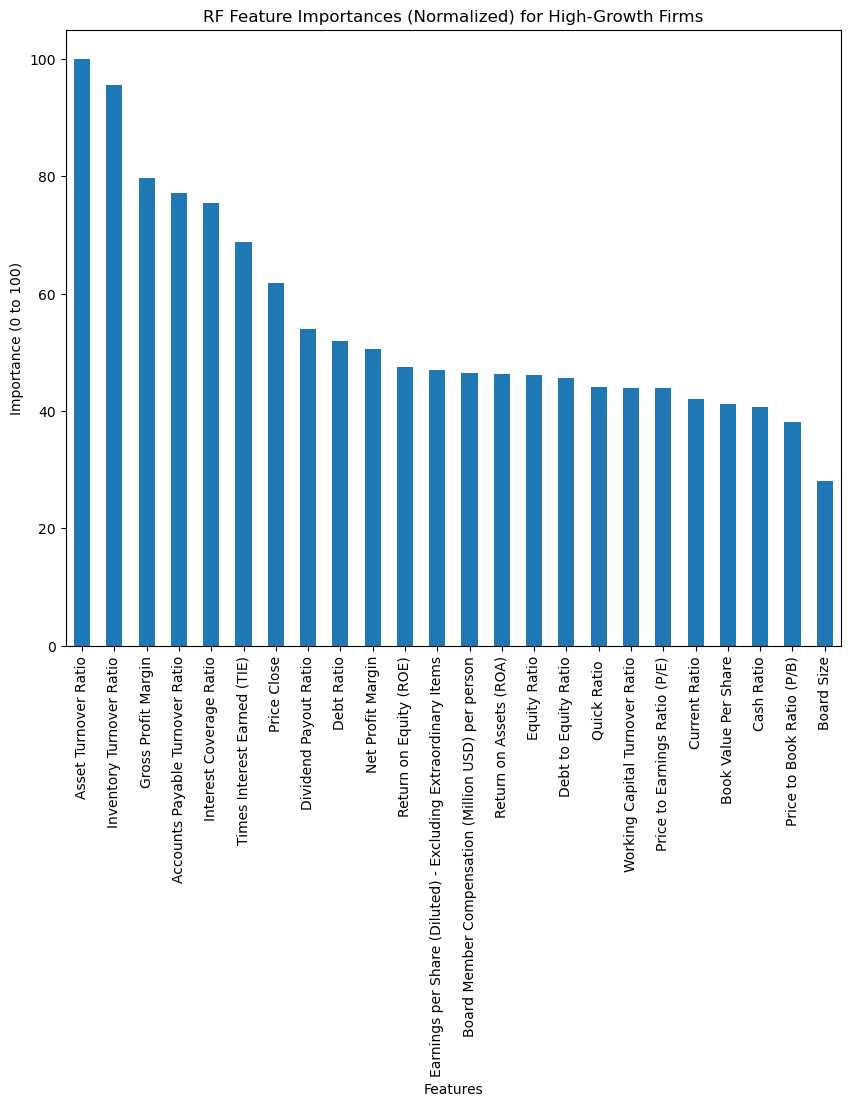

In [6]:
# Calculate feature importances
importances = HG_best_model_new.named_steps['rf'].feature_importances_
feature_names = HG_RF_X_new.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('RF Feature Importances (Normalized) for High-Growth Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

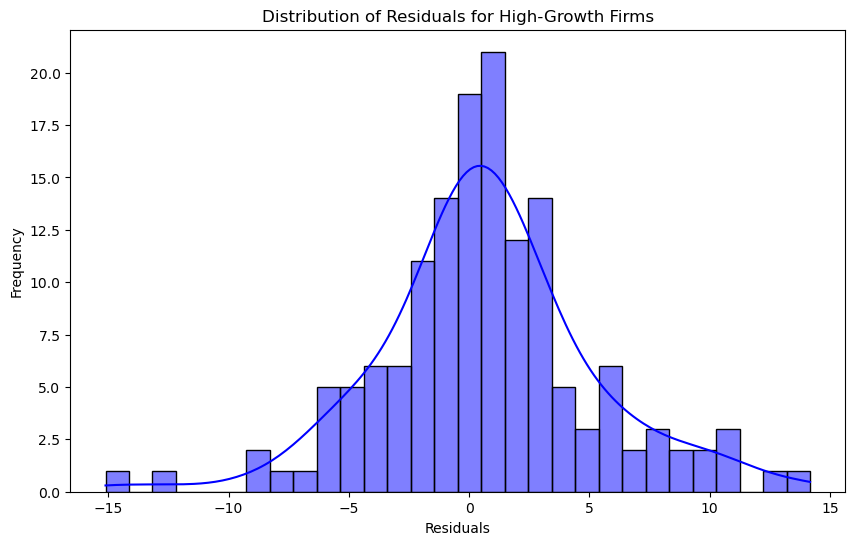

In [17]:
# Calculate residuals
HG_residuals_new = HG_RF_y_test_new - HG_RF_y_pred_new
# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(HG_residuals_new, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals for High-Growth Firms')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
##XGBoost

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Load the data
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter low-growth firms from the 'Growth Category' column
low_growth_firms_new = data[data['Growth Category'] == 'Low-Growth Firm']

# Define X and y
XG_X = low_growth_firms_new.iloc[:, 4:28]
XG_y = low_growth_firms_new.iloc[:, 3]

# Split the data into training and testing sets
XG_X_train, XG_X_test, XG_y_train, XG_y_test = train_test_split(XG_X, XG_y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
XG_X_train_scaled = scaler.fit_transform(XG_X_train)
XG_X_test_scaled = scaler.transform(XG_X_test)

# Initialize the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameters for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
grid_search.fit(XG_X_train_scaled, XG_y_train)

# Get the best model from grid search
best_xg_reg = grid_search.best_estimator_

# Output the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Predict on the test set
XG_y_pred = best_xg_reg.predict(XG_X_test_scaled)

# Calculate RMSE
XG_rmse = np.sqrt(mean_squared_error(XG_y_test, XG_y_pred))
print(f'XG_RMSE: {XG_rmse}')

# Calculate Mean Squared Forecast Error (MSFE)
XG_MSFE = mean_squared_error(XG_y_test, XG_y_pred)
print(f'XG_MSFE: {XG_MSFE}')

# Calculate out-of-sample R-squared (R^2_OS)
XG_numerator = np.sum((XG_y_test - XG_y_pred) ** 2)
XG_denominator = np.sum((XG_y_test - np.mean(XG_y_train)) ** 2)
XG_R2_OS = 1 - (XG_numerator / XG_denominator)
print(f'XG_Out-of-sample R-squared: {XG_R2_OS}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0

[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0

[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0

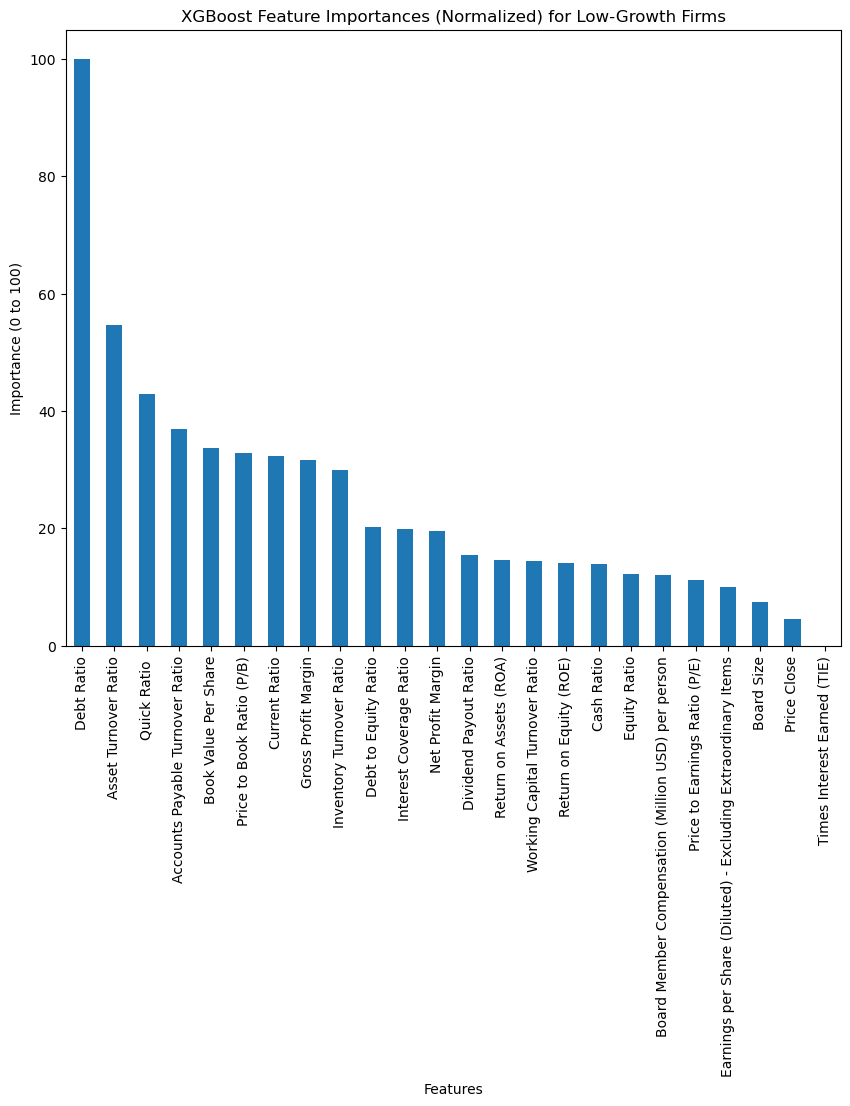

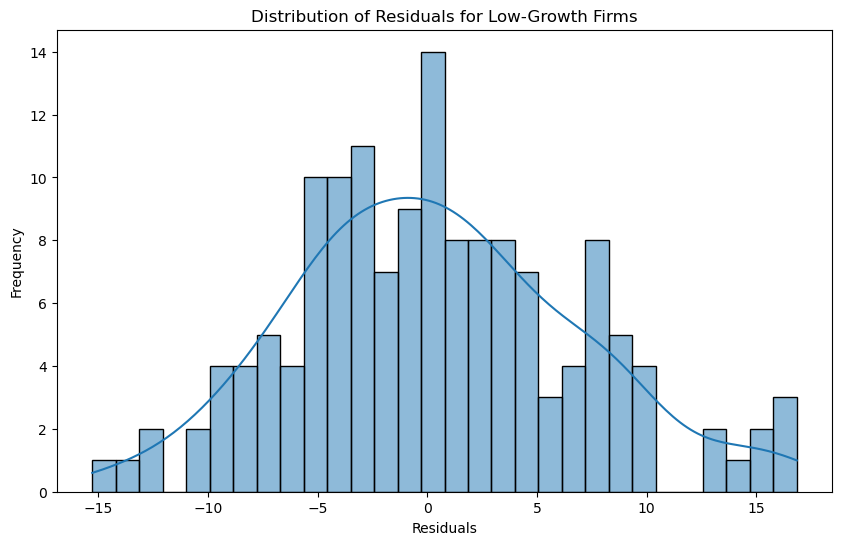

In [8]:
# Calculate feature importances
importances = best_xg_reg.feature_importances_
feature_names = XG_X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('XGBoost Feature Importances (Normalized) for Low-Growth Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

# Plot the distribution of residuals
residuals = XG_y_test - XG_y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals for Low-Growth Firms')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Load the data
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter low-growth firms from the 'Growth Category' column
Medium_growth_firms_new = data[data['Growth Category'] == 'Medium-Growth Firm']

# Define X and y
XG_X = Medium_growth_firms_new.iloc[:, 4:28]
XG_y = Medium_growth_firms_new.iloc[:, 3]

# Split the data into training and testing sets
XG_X_train, XG_X_test, XG_y_train, XG_y_test = train_test_split(XG_X, XG_y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
XG_X_train_scaled = scaler.fit_transform(XG_X_train)
XG_X_test_scaled = scaler.transform(XG_X_test)

# Initialize the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameters for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
grid_search.fit(XG_X_train_scaled, XG_y_train)

# Get the best model from grid search
best_xg_reg = grid_search.best_estimator_

# Output the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Predict on the test set
XG_y_pred = best_xg_reg.predict(XG_X_test_scaled)

# Calculate RMSE
XG_rmse = np.sqrt(mean_squared_error(XG_y_test, XG_y_pred))
print(f'XG_RMSE: {XG_rmse}')

# Calculate Mean Squared Forecast Error (MSFE)
XG_MSFE = mean_squared_error(XG_y_test, XG_y_pred)
print(f'XG_MSFE: {XG_MSFE}')

# Calculate out-of-sample R-squared (R^2_OS)
XG_numerator = np.sum((XG_y_test - XG_y_pred) ** 2)
XG_denominator = np.sum((XG_y_test - np.mean(XG_y_train)) ** 2)
XG_R2_OS = 1 - (XG_numerator / XG_denominator)
print(f'XG_Out-of-sample R-squared: {XG_R2_OS}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0

[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0

[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0

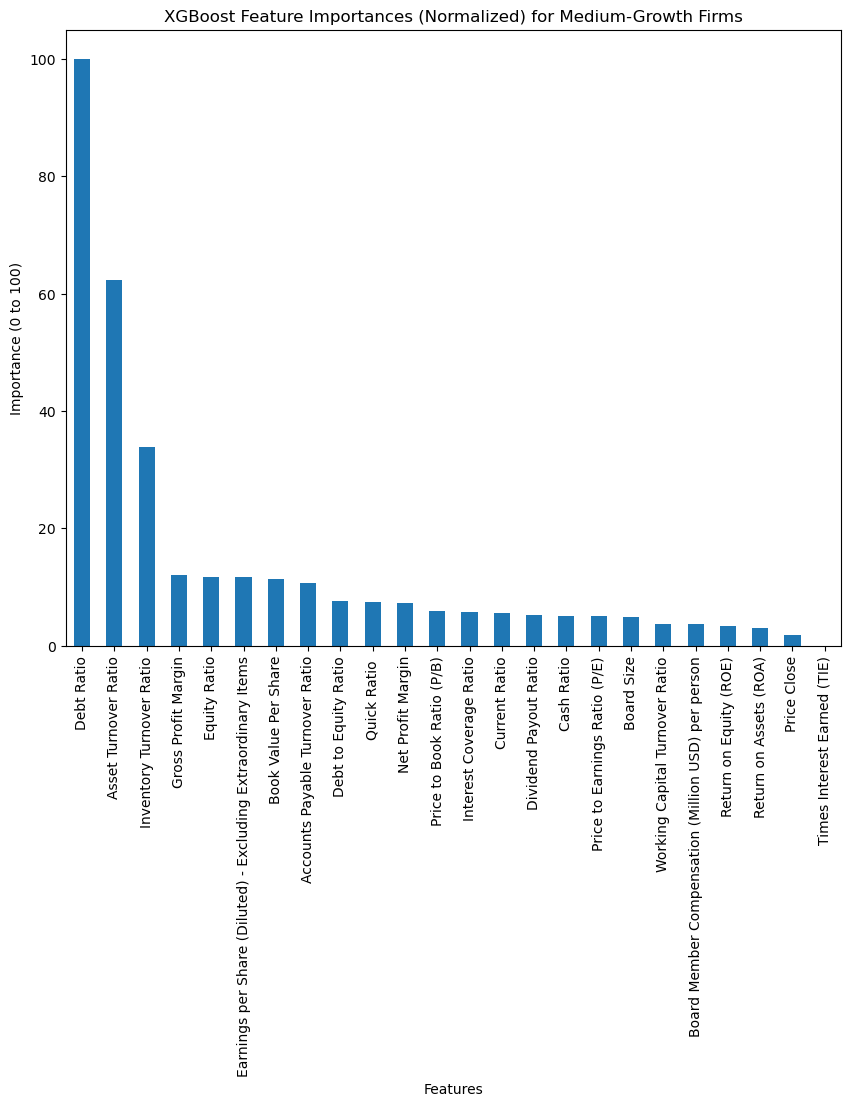

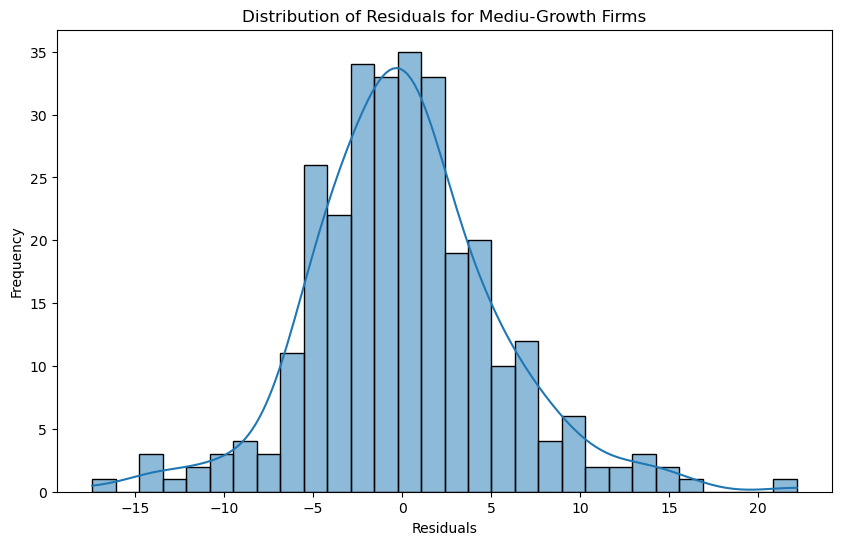

In [10]:
# Calculate feature importances
importances = best_xg_reg.feature_importances_
feature_names = XG_X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('XGBoost Feature Importances (Normalized) for Medium-Growth Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

# Plot the distribution of residuals
residuals = XG_y_test - XG_y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals for Medium-Growth Firms')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Load the data
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter low-growth firms from the 'Growth Category' column
High_growth_firms_new = data[data['Growth Category'] == 'High-Growth Firm']

# Define X and y
XG_X = High_growth_firms_new.iloc[:, 4:28]
XG_y = High_growth_firms_new.iloc[:, 3]

# Split the data into training and testing sets
XG_X_train, XG_X_test, XG_y_train, XG_y_test = train_test_split(XG_X, XG_y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
XG_X_train_scaled = scaler.fit_transform(XG_X_train)
XG_X_test_scaled = scaler.transform(XG_X_test)

# Initialize the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameters for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
grid_search.fit(XG_X_train_scaled, XG_y_train)

# Get the best model from grid search
best_xg_reg = grid_search.best_estimator_

# Output the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Predict on the test set
XG_y_pred = best_xg_reg.predict(XG_X_test_scaled)

# Calculate RMSE
XG_rmse = np.sqrt(mean_squared_error(XG_y_test, XG_y_pred))
print(f'XG_RMSE: {XG_rmse}')

# Calculate Mean Squared Forecast Error (MSFE)
XG_MSFE = mean_squared_error(XG_y_test, XG_y_pred)
print(f'XG_MSFE: {XG_MSFE}')

# Calculate out-of-sample R-squared (R^2_OS)
XG_numerator = np.sum((XG_y_test - XG_y_pred) ** 2)
XG_denominator = np.sum((XG_y_test - np.mean(XG_y_train)) ** 2)
XG_R2_OS = 1 - (XG_numerator / XG_denominator)
print(f'XG_Out-of-sample R-squared: {XG_R2_OS}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0

[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0

[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0

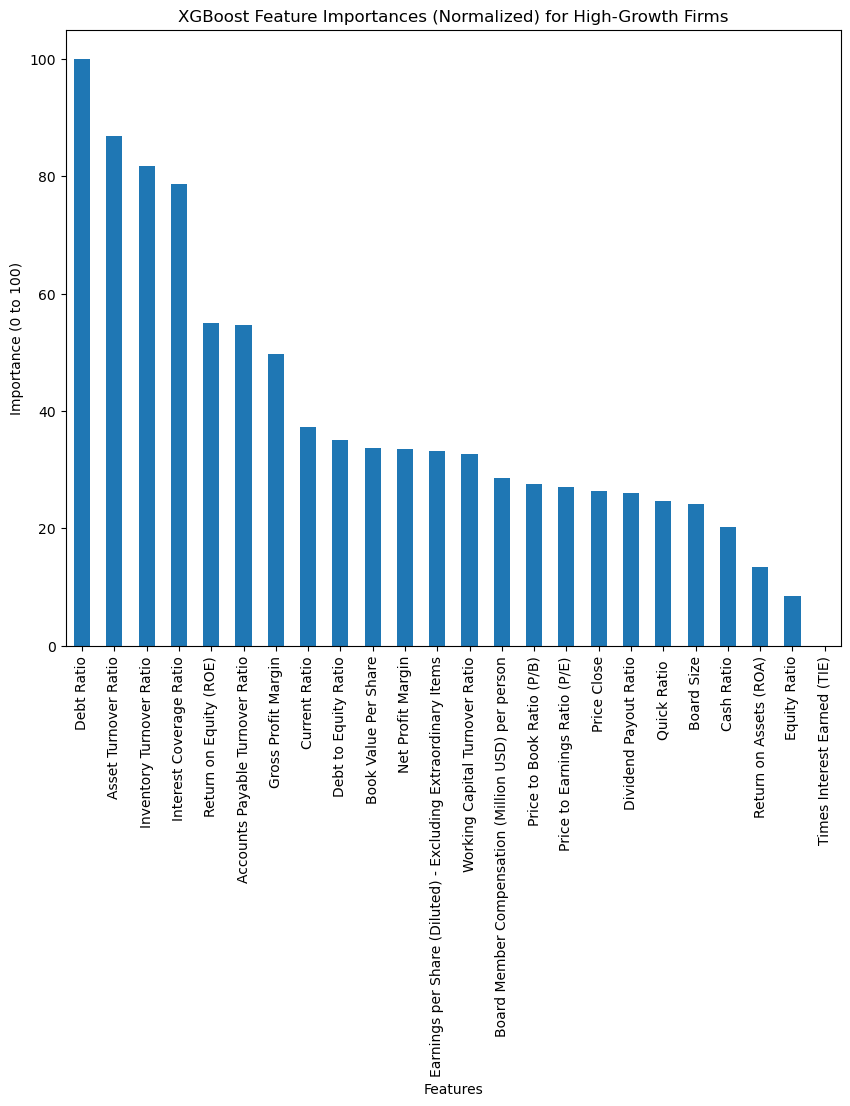

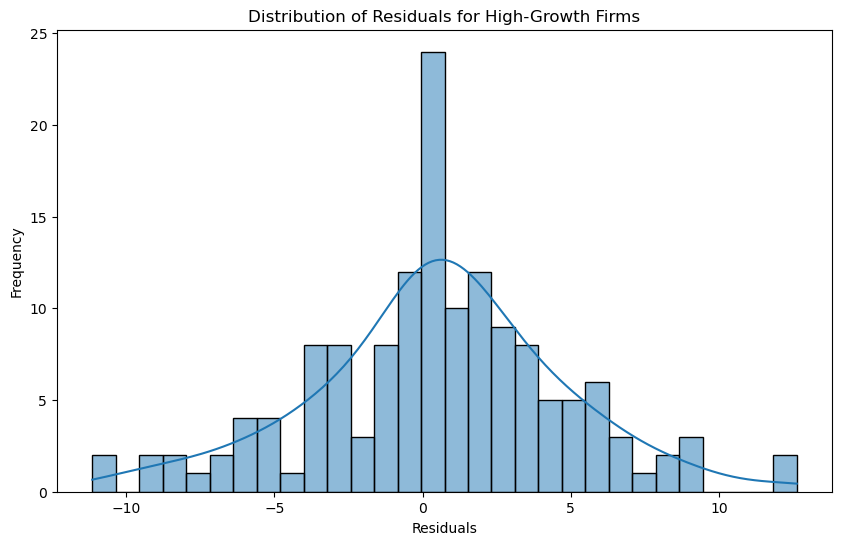

In [12]:
# Calculate feature importances
importances = best_xg_reg.feature_importances_
feature_names = XG_X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Normalize the feature importances to range from 0 to 100
normalized_importances = 100 * (feature_importances / feature_importances.max())

# Sort the feature importances in descending order
sorted_importances = normalized_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='bar')
plt.title('XGBoost Feature Importances (Normalized) for High-Growth Firms')
plt.xlabel('Features')
plt.ylabel('Importance (0 to 100)')
plt.show()

# Plot the distribution of residuals
residuals = XG_y_test - XG_y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals for High-Growth Firms')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [4]:
##DM test

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from scipy import stats

# Load the data from Excel file
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
X = data.iloc[:, 4:28]  # Columns E to AC
y = data.iloc[:, 3]     # Column D

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the OLS model
ols = LinearRegression()

# Define a custom scorer for GridSearchCV to minimize RMSE
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Perform grid search with cross-validation (though for OLS there are no hyperparameters, this is illustrative)
param_grid = {}  # No hyperparameters to tune for OLS

grid_search = GridSearchCV(estimator=ols, param_grid=param_grid, scoring=make_scorer(rmse_scorer), cv=3, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_ols = grid_search.best_estimator_

# Predict on the test set
ols_y_pred = best_ols.predict(X_test_scaled)

# Calculate RMSE for OLS
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_y_pred))
print(f'OLS RMSE: {ols_rmse}')

# Calculate Mean Squared Forecast Error (MSFE) for OLS
ols_msfe = mean_squared_error(y_test, ols_y_pred)
print(f'OLS MSFE: {ols_msfe}')

# Calculate out-of-sample R-squared (R^2_OS) for OLS
ols_numerator = np.sum((y_test - ols_y_pred) ** 2)
ols_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
ols_r2_os = 1 - (ols_numerator / ols_denominator)
print(f'OLS Out-of-sample R-squared: {ols_r2_os}')

# Define the Random Forest model pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=300, 
        max_features=None, 
        max_depth=30, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        bootstrap=True,
        random_state=42
    ))
])

# Fit the Random Forest model
pipeline_rf.fit(X_train, y_train)

# Predict on the test set with Random Forest
rf_y_pred = pipeline_rf.predict(X_test)

# Calculate RMSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
print(f'Random Forest RMSE: {rf_rmse}')

# Calculate Mean Squared Forecast Error (MSFE) for Random Forest
rf_msfe = mean_squared_error(y_test, rf_y_pred)
print(f'Random Forest MSFE: {rf_msfe}')

# Calculate out-of-sample R-squared (R^2_OS) for Random Forest
rf_numerator = np.sum((y_test - rf_y_pred) ** 2)
rf_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
rf_r2_os = 1 - (rf_numerator / rf_denominator)
print(f'Random Forest Out-of-sample R-squared: {rf_r2_os}')

# Diebold-Mariano Test
def diebold_mariano_test(actual, pred1, pred2):
    d = (actual - pred1) ** 2 - (actual - pred2) ** 2
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))
    return dm_stat, p_value

dm_stat, dm_p_value = diebold_mariano_test(y_test, rf_y_pred, ols_y_pred)

print("Diebold-Mariano Test Statistic:", dm_stat)
print("Diebold-Mariano Test p-value:", dm_p_value)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
OLS RMSE: 45.23195297582969
OLS MSFE: 2045.9295700076689
OLS Out-of-sample R-squared: -18.768550901482662
Random Forest RMSE: 5.709697088976417
Random Forest MSFE: 32.60064084786576
Random Forest Out-of-sample R-squared: 0.6850001889265556
Diebold-Mariano Test Statistic: 1.0679570986330662
Diebold-Mariano Test p-value: 0.2855398643275522


In [ ]:
# Define the Random Forest model pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=300, 
        max_features=None, 
        max_depth=30, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        bootstrap=True,
        random_state=42
    ))
])

# Fit the Random Forest model
pipeline_rf.fit(X_train, y_train)

# Predict on the test set with Random Forest
rf_y_pred = pipeline_rf.predict(X_test)

# Calculate RMSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
print(f'Random Forest RMSE: {rf_rmse}')

# Calculate Mean Squared Forecast Error (MSFE) for Random Forest
rf_msfe = mean_squared_error(y_test, rf_y_pred)
print(f'Random Forest MSFE: {rf_msfe}')

# Calculate out-of-sample R-squared (R^2_OS) for Random Forest
rf_numerator = np.sum((y_test - rf_y_pred) ** 2)
rf_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
rf_r2_os = 1 - (rf_numerator / rf_denominator)
print(f'Random Forest Out-of-sample R-squared: {rf_r2_os}')

# Initialize the XGBoost model with the best hyperparameters
best_xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.7,
    random_state=42
)

# Fit the XGBoost model
best_xg_reg.fit(X_train_scaled, y_train)

# Predict on the test set with XGBoost
xg_y_pred = best_xg_reg.predict(X_test_scaled)

# Calculate RMSE for XGBoost
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_y_pred))
print(f'XG_RMSE: {xg_rmse}')

# Calculate Mean Squared Forecast Error (MSFE) for XGBoost
xg_msfe = mean_squared_error(y_test, xg_y_pred)
print(f'XG_MSFE: {xg_msfe}')

# Calculate out-of-sample R-squared (R^2_OS) for XGBoost
xg_numerator = np.sum((y_test - xg_y_pred) ** 2)
xg_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
xg_r2_os = 1 - (xg_numerator / xg_denominator)
print(f'XG_Out-of-sample R-squared: {xg_r2_os}')

# Diebold-Mariano Test
def diebold_mariano_test(actual, pred1, pred2):
    d = (actual - pred1) ** 2 - (actual - pred2) ** 2
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))
    return dm_stat, p_value

dm_stat, dm_p_value = diebold_mariano_test(y_test, xg_y_pred, ols_y_pred)

print("Diebold-Mariano Test Statistic:", dm_stat)
print("Diebold-Mariano Test p-value:", dm_p_value)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats
import matplotlib.pyplot as plt

# Load the data from Excel file
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
X = data.iloc[:, 4:28]  # Columns E to AC
y = data.iloc[:, 3]     # Column D

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Linear Regression model
ols = LinearRegression()
param_grid = {}  # No hyperparameters to tune for OLS
grid_search = GridSearchCV(estimator=ols, param_grid=param_grid, scoring=make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))), cv=3, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_ols = grid_search.best_estimator_
ols_y_pred = best_ols.predict(X_test_scaled)
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_y_pred))
ols_msfe = mean_squared_error(y_test, ols_y_pred)
ols_numerator = np.sum((y_test - ols_y_pred) ** 2)
ols_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
ols_r2_os = 1 - (ols_numerator / ols_denominator)

print(f'OLS RMSE: {ols_rmse}')
print(f'OLS MSFE: {ols_msfe}')
print(f'OLS Out-of-sample R-squared: {ols_r2_os}')

# Best hyperparameters obtained from the tuner
best_units_1 = 64
best_dropout_1 = 0.1
best_units_2 = 512
best_dropout_2 = 0.0

# Build and train the ANN model with the optimal hyperparameters
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(units=best_units_1, activation='relu'),
    Dropout(rate=best_dropout_1),
    Dense(units=best_units_2, activation='relu'),
    Dropout(rate=best_dropout_2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
ann_y_pred = model.predict(X_test_scaled).flatten()

ann_rmse = np.sqrt(mean_squared_error(y_test, ann_y_pred))
ann_msfe = mean_squared_error(y_test, ann_y_pred)
ann_numerator = np.sum((y_test - ann_y_pred) ** 2)
ann_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
ann_r2_os = 1 - (ann_numerator / ann_denominator)

print(f'ANN RMSE: {ann_rmse}')
print(f'ANN MSFE: {ann_msfe}')
print(f'ANN Out-of-sample R-squared: {ann_r2_os}')

# Diebold-Mariano Test
def diebold_mariano_test(actual, pred1, pred2):
    d = (actual - pred1) ** 2 - (actual - pred2) ** 2
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))
    return dm_stat, p_value

dm_stat, dm_p_value = diebold_mariano_test(y_test, ann_y_pred, ols_y_pred)

print("Diebold-Mariano Test Statistic:", dm_stat)
print("Diebold-Mariano Test p-value:", dm_p_value)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
OLS RMSE: 45.23195297582969
OLS MSFE: 2045.9295700076689
OLS Out-of-sample R-squared: -18.768550901482662
Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6270.9536 - mean_squared_error: 6270.9536 - val_loss: 4026.5476 - val_mean_squared_error: 4026.5476
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3366.9185 - mean_squared_error: 3366.9185 - val_loss: 1726.0172 - val_mean_squared_error: 1726.0172
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2498.6152 - mean_squared_error: 2498.6152 - val_loss: 945.2603 - val_mean_squared_error: 945.2603
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1457.9987 - mean_squared_error: 1457.9987 - val_loss: 733.

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.0440 - mean_squared_error: 70.0440 - val_loss: 64.2888 - val_mean_squared_error: 64.2888
Epoch 87/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64.2900 - mean_squared_error: 64.2900 - val_loss: 66.5431 - val_mean_squared_error: 66.5431
Epoch 88/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66.8066 - mean_squared_error: 66.8066 - val_loss: 65.3815 - val_mean_squared_error: 65.3815
Epoch 89/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67.0291 - mean_squared_error: 67.0291 - val_loss: 69.8387 - val_mean_squared_error: 69.8387
Epoch 90/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67.7047 - mean_squared_error: 67.7047 - val_loss: 64.6455 - val_mean_squared_error: 64.6455
Epoch 91/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 77.5213 - mean_squared_error: 77.5213 - val_loss: 67.9002 - val_mean_squared_error: 67.9002
Epoch 92/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71.8556 - mean_squared_error: 71.8556 - v

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy import stats

# Load the data from Excel file
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
X = data.iloc[:, 4:28]
y = data.iloc[:, 3]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LASSO model with the best hyperparameter
best_lasso = Lasso(alpha=0.001, max_iter=5000)
# Fit the LASSO model
best_lasso.fit(X_train_scaled, y_train)
# Predict on the test set with LASSO
lasso_y_pred = best_lasso.predict(X_test_scaled)

# Initialize the Linear Regression model
ols = LinearRegression()
# Fit the Linear Regression model
ols.fit(X_train_scaled, y_train)
# Predict on the test set with Linear Regression
ols_y_pred = ols.predict(X_test_scaled)

# Calculate RMSE for LASSO
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
print(f'LASSO RMSE: {lasso_rmse}')

# Calculate RMSE for Linear Regression
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_y_pred))
print(f'OLS RMSE: {ols_rmse}')

# Diebold-Mariano Test Function
def diebold_mariano_test(actual, pred1, pred2):
    d = (actual - pred1) ** 2 - (actual - pred2) ** 2
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))
    return dm_stat, p_value

# Perform the Diebold-Mariano Test
dm_stat, dm_p_value = diebold_mariano_test(y_test, lasso_y_pred, ols_y_pred)

print("Diebold-Mariano Test Statistic:", dm_stat)
print("Diebold-Mariano Test p-value:", dm_p_value)


LASSO RMSE: 42.98216280267506
OLS RMSE: 45.23195297582969
Diebold-Mariano Test Statistic: -1.028048305731259
Diebold-Mariano Test p-value: 0.3039271054993138


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb
from scipy import stats
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
X = data.iloc[:, 4:28]  # Columns E to AC
y = data.iloc[:, 3]     # Column D

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the OLS model
ols = LinearRegression()

# Define a custom scorer for GridSearchCV to minimize RMSE
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Perform grid search with cross-validation (though for OLS there are no hyperparameters, this is illustrative)
param_grid = {}  # No hyperparameters to tune for OLS

grid_search = GridSearchCV(estimator=ols, param_grid=param_grid, scoring=make_scorer(rmse_scorer), cv=3, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_ols = grid_search.best_estimator_

# Predict on the test set
ols_y_pred = best_ols.predict(X_test_scaled)

# Calculate RMSE for OLS
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_y_pred))
print(f'OLS RMSE: {ols_rmse}')

# Calculate Mean Squared Forecast Error (MSFE) for OLS
ols_msfe = mean_squared_error(y_test, ols_y_pred)
print(f'OLS MSFE: {ols_msfe}')

# Calculate out-of-sample R-squared (R^2_OS) for OLS
ols_numerator = np.sum((y_test - ols_y_pred) ** 2)
ols_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
ols_r2_os = 1 - (ols_numerator / ols_denominator)
print(f'OLS Out-of-sample R-squared: {ols_r2_os}')

# Initialize the XGBoost model with the best hyperparameters
best_xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.7,
    random_state=42
)

# Fit the XGBoost model
best_xg_reg.fit(X_train_scaled, y_train)

# Predict on the test set with XGBoost
xg_y_pred = best_xg_reg.predict(X_test_scaled)

# Calculate RMSE for XGBoost
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_y_pred))
print(f'XG_RMSE: {xg_rmse}')

# Calculate Mean Squared Forecast Error (MSFE) for XGBoost
xg_msfe = mean_squared_error(y_test, xg_y_pred)
print(f'XG_MSFE: {xg_msfe}')

# Calculate out-of-sample R-squared (R^2_OS) for XGBoost
xg_numerator = np.sum((y_test - xg_y_pred) ** 2)
xg_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
xg_r2_os = 1 - (xg_numerator / xg_denominator)
print(f'XG_Out-of-sample R-squared: {xg_r2_os}')

# Diebold-Mariano Test
def diebold_mariano_test(actual, pred1, pred2):
    d = (actual - pred1) ** 2 - (actual - pred2) ** 2
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))
    return dm_stat, p_value

dm_stat, dm_p_value = diebold_mariano_test(y_test, xg_y_pred, rf_y_pred)

print("Diebold-Mariano Test Statistic:", dm_stat)
print("Diebold-Mariano Test p-value:", dm_p_value)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
OLS RMSE: 45.23195297582969
OLS MSFE: 2045.9295700076689
OLS Out-of-sample R-squared: -18.768550901482662
XG_RMSE: 5.469646170096909
XG_MSFE: 29.91702922605578
XG_Out-of-sample R-squared: 0.7109302667372801
Diebold-Mariano Test Statistic: 2.6816226419528335
Diebold-Mariano Test p-value: 0.007326605338392023


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats
import matplotlib.pyplot as plt

# Load the data from Excel file
file_path = 'C:/Users/Bowen/Desktop/ratio data.xlsx'
data = pd.read_excel(file_path)

# Define X and y
X = data.iloc[:, 4:28]  # Columns E to AC
y = data.iloc[:, 3]     # Column D

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best hyperparameters obtained from the tuner
best_units_1 = 64
best_dropout_1 = 0.1
best_units_2 = 512
best_dropout_2 = 0.0

# Build and train the ANN model with the optimal hyperparameters
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(units=best_units_1, activation='relu'),
    Dropout(rate=best_dropout_1),
    Dense(units=best_units_2, activation='relu'),
    Dropout(rate=best_dropout_2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
ann_y_pred = model.predict(X_test_scaled).flatten()

ann_rmse = np.sqrt(mean_squared_error(y_test, ann_y_pred))
ann_msfe = mean_squared_error(y_test, ann_y_pred)
ann_numerator = np.sum((y_test - ann_y_pred) ** 2)
ann_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
ann_r2_os = 1 - (ann_numerator / ann_denominator)

print(f'ANN RMSE: {ann_rmse}')
print(f'ANN MSFE: {ann_msfe}')
print(f'ANN Out-of-sample R-squared: {ann_r2_os}')

# Initialize the XGBoost model with the best hyperparameters
best_xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.7,
    random_state=42
)

# Fit the XGBoost model
best_xg_reg.fit(X_train_scaled, y_train)

# Predict on the test set with XGBoost
xg_y_pred = best_xg_reg.predict(X_test_scaled)

# Calculate RMSE for XGBoost
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_y_pred))
print(f'XG_RMSE: {xg_rmse}')

# Calculate Mean Squared Forecast Error (MSFE) for XGBoost
xg_msfe = mean_squared_error(y_test, xg_y_pred)
print(f'XG_MSFE: {xg_msfe}')

# Calculate out-of-sample R-squared (R^2_OS) for XGBoost
xg_numerator = np.sum((y_test - xg_y_pred) ** 2)
xg_denominator = np.sum((y_test - np.mean(y_train)) ** 2)
xg_r2_os = 1 - (xg_numerator / xg_denominator)
print(f'XG_Out-of-sample R-squared: {xg_r2_os}')

# Diebold-Mariano Test
def diebold_mariano_test(actual, pred1, pred2):
    d = (actual - pred1) ** 2 - (actual - pred2) ** 2
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))
    return dm_stat, p_value

dm_stat, dm_p_value = diebold_mariano_test(y_test, xg_y_pred, ann_y_pred)

print("Diebold-Mariano Test Statistic:", dm_stat)
print("Diebold-Mariano Test p-value:", dm_p_value)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6208.9800 - mean_squared_error: 6208.9800 - val_loss: 3772.4827 - val_mean_squared_error: 3772.4827
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3300.4426 - mean_squared_error: 3300.4426 - val_loss: 1449.4329 - val_mean_squared_error: 1449.4329
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1915.1071 - mean_squared_error: 1915.1071 - val_loss: 888.4351 - val_mean_squared_error: 888.4351
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1112.7156 - mean_squared_error: 1112.7156 - val_loss: 707.5502 - val_mean_squared_error: 707.5502
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 969.4955 - mean_squared_error: 969.4955 - val_loss: 583.6178 - val_mean_squared_error: 583.6178
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 640.7175 - mean_squared_error: 640.7175 - val_loss: 518.2847 - val_mean_squared_error: 518.2847
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.7423 - mean_squared_error: 63.7423 - val_loss: 62.7907 - val_mean_squared_error: 62.7907
Epoch 89/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.9094 - mean_squared_error: 62.9094 - val_loss: 62.7267 - val_mean_squared_error: 62.7267
Epoch 90/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.8175 - mean_squared_error: 61.8175 - val_loss: 67.4569 - val_mean_squared_error: 67.4569
Epoch 91/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.9838 - mean_squared_error: 61.9838 - val_loss: 62.3902 - val_mean_squared_error: 62.3902
Epoch 92/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.8546 - mean_squared_error: 59.8546 - val_loss: 66.0043 - val_mean_squared_error: 66.0043
Epoch 93/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.3801 - mean_squared_error: 64.3801 - val_loss: 61.1522 - val_mean_squared_error: 61.1522
Epoch 94/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.6063 - mean_squared_error: 59.6063 - v